# Dataset Loading

In [2]:
import pandas as pd

# Path to the .csv file in your Google Drive
file_path = '/content/drive/MyDrive/Crime_Dataset_Coursework1-1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(df.head())

<ipython-input-2-cb871c9cf649>:7: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


   Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201202980         3550  180042096  08/23/2018 09:52:08 PM        35B   
1    201181293         3522  180015424  03/30/2018 01:00:55 AM        35A   
2    201181293         3562  180015424  03/30/2018 01:00:55 AM        35A   
3    201193163         3520  180029476  06/14/2018 10:26:45 PM        35A   
4    201204355         2204  180043926  09/03/2018 12:06:54 PM        220   

   Victims             Crime Name1                     Crime Name2  \
0        1   Crime Against Society       Drug Equipment Violations   
1        1   Crime Against Society        Drug/Narcotic Violations   
2        1   Crime Against Society        Drug/Narcotic Violations   
3        1   Crime Against Society        Drug/Narcotic Violations   
4        1  Crime Against Property  Burglary/Breaking and Entering   

                              Crime Name3 Police District Name  ...  \
0        DRUGS - NARCOTIC EQUIP - POSSESS    

In [3]:
# Get the count of unique values in each column
unique_counts = df.nunique()

# Display the unique counts for each feature
print(unique_counts)


Incident ID               280928
Offence Code                 619
CR Number                 280893
Dispatch Date / Time      235077
NIBRS Code                    58
Victims                       10
Crime Name1                    5
Crime Name2                   59
Crime Name3                  336
Police District Name           9
Block Address              21503
City                          66
State                         11
Zip Code                     186
Agency                         8
Place                         99
Sector                        15
Beat                          56
PRA                         1557
Address Number               396
Street Prefix                  4
Street Name                 7777
Street Suffix                  7
Street Type                   32
Start_Date_Time           221547
End_Date_Time             101809
Latitude                   44681
Longitude                  40035
Police District Number        15
Location                   33635
dtype: int

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Analysis

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [4]:
df.describe()

Incident ID     CR Number        Victims       Zip Code  \
count  3.060940e+05  3.060940e+05  306094.000000  302915.000000   
mean   2.012369e+08  1.692787e+08       1.022692   20876.535939   
std    8.626185e+04  6.210304e+07       0.192311     170.157722   
min    2.010871e+08  1.001107e+07       1.000000       6.000000   
25%    2.011625e+08  1.705431e+08       1.000000   20853.000000   
50%    2.012361e+08  1.900183e+08       1.000000   20878.000000   
75%    2.013109e+08  2.000466e+08       1.000000   20904.000000   
max    2.013872e+08  2.204211e+08      22.000000   29882.000000   

       Address Number       Latitude      Longitude  
count    2.799850e+05  306094.000000  306094.000000  
mean     8.393001e+03      38.146328     -75.269490  
std      1.526296e+04       5.974082      11.786118  
min      1.000000e+00       0.000000     -77.516753  
25%      1.600000e+03      39.020392     -77.197117  
50%      8.100000e+03      39.072844     -77.099464  
75%      1.250000e+04      39.142072     -77.029046  
max      2.090600e+06      90.000000       0.000000

In [358]:
df.shape


(306094, 30)

List of features with missing values: ['Dispatch Date / Time', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name', 'Block Address', 'City', 'Zip Code', 'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type', 'End_Date_Time']
Feature 'Dispatch Date / Time' has 49029 missing values.
Feature 'Crime Name1' has 272 missing values.
Feature 'Crime Name2' has 272 missing values.
Feature 'Crime Name3' has 272 missing values.
Feature 'Police District Name' has 94 missing values.
Feature 'Block Address' has 26206 missing values.
Feature 'City' has 1276 missing values.
Feature 'Zip Code' has 3179 missing values.
Feature 'Sector' has 1530 missing values.
Feature 'Beat' has 1530 missing values.
Feature 'PRA' has 239 missing values.
Feature 'Address Number' has 26109 missing values.
Feature 'Street Prefix' has 292463 missing values.
Feature 'Street Name' has 1 missing values.
Feature 'Street Suffix' has 300662 missing values.
Feature

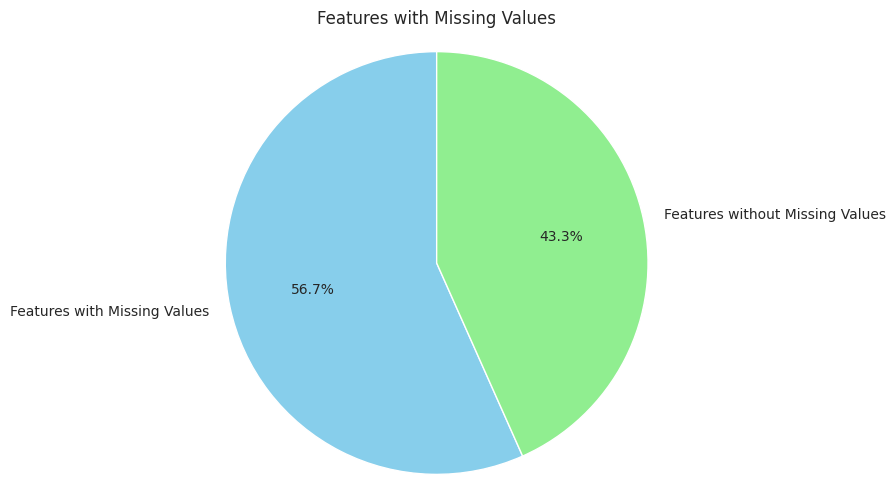

In [359]:
import pandas as pd
import matplotlib.pyplot as plt



# Check for missing values in each feature
missing_values = df.isnull().sum()

# Create a list of features with missing values
features_with_missing = missing_values[missing_values > 0].index.tolist()

# Display the list of features with missing values
print("List of features with missing values:", features_with_missing)

# Use a for loop to display the count of missing values in each feature
for feature in features_with_missing:
    print(f"Feature '{feature}' has {missing_values[feature]} missing values.")

# Data for pie chart
labels = ['Features with Missing Values', 'Features without Missing Values']
sizes = [len(features_with_missing), df.shape[1] - len(features_with_missing)]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Features with Missing Values')
plt.show()


Percentage of missing values in each feature with missing values:
Dispatch Date / Time    16.017629
Crime Name1              0.088862
Crime Name2              0.088862
Crime Name3              0.088862
Police District Name     0.030710
Block Address            8.561422
City                     0.416865
Zip Code                 1.038570
Sector                   0.499846
Beat                     0.499846
PRA                      0.078081
Address Number           8.529733
Street Prefix           95.546793
Street Name              0.000327
Street Suffix           98.225382
Street Type              0.110750
End_Date_Time           52.813188
dtype: float64


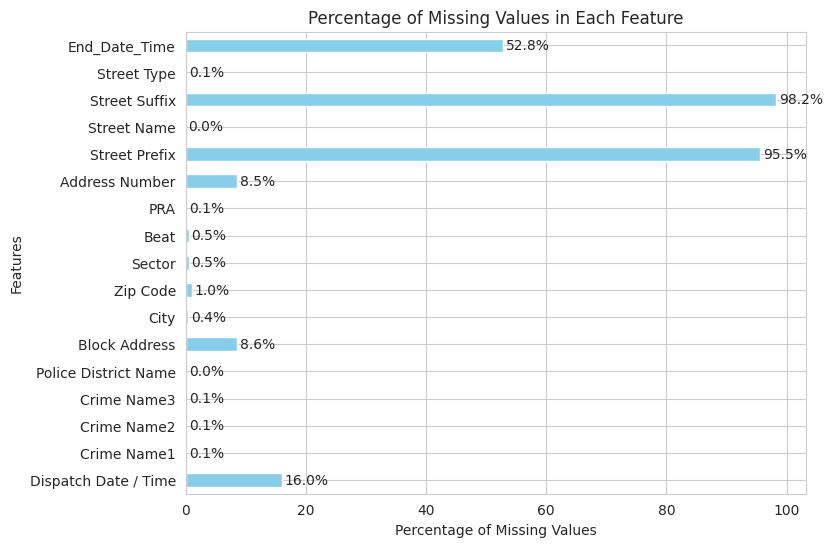

In [360]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the total number of rows
total_rows = df.shape[0]

# Check for missing values in each feature
missing_values = df.isnull().sum()

# Filter features that contain missing values
features_with_missing = missing_values[missing_values > 0]

# Calculate the percentage of missing values in each feature
percentage_missing = (features_with_missing / total_rows) * 100

# Display the percentage of missing values in each feature
print("Percentage of missing values in each feature with missing values:")
print(percentage_missing)

# Plotting the bar graph
# Horizontal Bar Chart with Values
plt.figure(figsize=(8, 6))
ax = percentage_missing.plot(kind='barh', color='skyblue')

# Adding labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Percentage of Missing Values in Each Feature')

# Annotating the bars with the percentage values
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2,
            f'{i.get_width():.1f}%', va='center', fontsize=10)

plt.show()

# Exploratory data analysis (EDA) and Data Cleaning

In [361]:
# Get values from Feature1 where Feature2 is not null
values_in_feature1 = df.loc[df['Street Suffix'].notnull(), 'Street Name'].unique()

# Convert to a list if needed
values_in_feature1_list = values_in_feature1.tolist()

# Display the list of values
print("Values in Feature1 where Feature2 has values:", values_in_feature1_list)


Values in Feature1 where Feature2 has values: ['MARKET', 'UNIVERSITY', 'WISCONSIN', 'MASSACHUSETTS', 'ORCHARD', 'IRVING', 'OTIS', '6TH', 'GEORGIA', 'INFIELD', '270', 'WILLIAMSBURG', 'EXCHANGE', '7TH', '13TH', 'MACOMB', 'NEW JERSEY', 'BRANDYWINE', '3RD', 'LIVINGSTON', 'PEABODY', 'CONSTITUTION', 'PINEY BRANCH', 'ARIZONA', 'MAPLE', 'CONNECTICUT', 'NEW HAMPSHIRE', 'DUKE', 'KANSAS', 'COLUMBIA']


In [362]:
# Combine 'Street Prefix', 'Street Name', and 'Street Suffix' intelligently
# Where 'Street Suffix' is null, use 'Street Prefix', otherwise use 'Street Suffix'
df['Street Name'] = df['Street Prefix'].fillna('') + ' ' + df['Street Name'] + ' ' + df['Street Suffix'].fillna('')

# Drop 'Street Prefix' and 'Street Suffix' columns after merging
df = df.drop(columns=['Street Prefix', 'Street Suffix'])

# Remove any extra spaces that might have been introduced
df['Street Name'] = df['Street Name'].str.strip()

# Display the updated DataFrame
print(df)


        Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201202980         3550  180042096  08/23/2018 09:52:08 PM   
1         201181293         3522  180015424  03/30/2018 01:00:55 AM   
2         201181293         3562  180015424  03/30/2018 01:00:55 AM   
3         201193163         3520  180029476  06/14/2018 10:26:45 PM   
4         201204355         2204  180043926  09/03/2018 12:06:54 PM   
...             ...          ...        ...                     ...   
306089    201320571         1399  210006666  02/21/2021 07:25:28 AM   
306090    201329875         2305  210017101  05/06/2021 10:54:47 PM   
306091    201329751         5016  210016952  05/05/2021 10:38:58 PM   
306092    201323117         9099  210009468  03/13/2021 12:07:14 PM   
306093    201327806         2305  210014587  04/19/2021 02:17:29 PM   

       NIBRS Code  Victims             Crime Name1  \
0             35B        1   Crime Against Society   
1             35A        1   Crime Agai

In [363]:
# Convert 'Start_Date_Time', 'Dispatch Date / Time', and 'End_Date_Time' columns to datetime format
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'])
df['End_Date_Time'] = pd.to_datetime(df['End_Date_Time'])

# Separate 'Start_Date_Time' into 'Start Date' and 'Start Time'
df['Start Date'] = df['Start_Date_Time'].dt.date
df['Start Time'] = df['Start_Date_Time'].dt.strftime('%H:%M')  # 24-hour format

# Separate 'Dispatch Date / Time' into 'Dispatch Date' and 'Dispatch Time'
df['Dispatch Date'] = df['Dispatch Date / Time'].dt.date
df['Dispatch Time'] = df['Dispatch Date / Time'].dt.strftime('%H:%M')  # 24-hour format

# Separate 'End_Date_Time' into 'End Date' and 'End Time'
df['End Date'] = df['End_Date_Time'].dt.date
df['End Time'] = df['End_Date_Time'].dt.strftime('%H:%M')  # 24-hour format

# Drop the original combined date-time columns if no longer needed
df = df.drop(columns=['Start_Date_Time', 'Dispatch Date / Time', 'End_Date_Time'])

# Display the updated DataFrame
print(df)


<ipython-input-363-6e07e439f6b8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
<ipython-input-363-6e07e439f6b8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'])


        Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0         201202980         3550  180042096        35B        1   
1         201181293         3522  180015424        35A        1   
2         201181293         3562  180015424        35A        1   
3         201193163         3520  180029476        35A        1   
4         201204355         2204  180043926        220        1   
...             ...          ...        ...        ...      ...   
306089    201320571         1399  210006666        13B        1   
306090    201329875         2305  210017101        23F        1   
306091    201329751         5016  210016952        90Z        1   
306092    201323117         9099  210009468        90Z        1   
306093    201327806         2305  210014587        23F        1   

                   Crime Name1                     Crime Name2  \
0        Crime Against Society       Drug Equipment Violations   
1        Crime Against Society        Drug/Narcotic Violations 

In [364]:
df['Start Date'] = df['Start Date'].astype(str)
df['Start Time'] = df['Start Time'].astype(str)
df['End Date'] = df['End Date'].astype(str)
df['End Time'] = df['End Time'].astype(str)

# Combine date and time for Start and End
df['Start_Date_Time'] = pd.to_datetime(df['Start Date'] + ' ' + df['Start Time'])
df['End_Date_Time'] = pd.to_datetime(df['End Date'] + ' ' + df['End Time'], errors='coerce')

# Calculate the duration (time required to resolve the case)
df['Resolution Time'] = df['End_Date_Time'] - df['Start_Date_Time']

# Display the updated DataFrame
print(df[['Start_Date_Time', 'End_Date_Time', 'Resolution Time']])

           Start_Date_Time       End_Date_Time Resolution Time
0      2018-08-23 21:52:00                 NaT             NaT
1      2018-03-30 01:01:00                 NaT             NaT
2      2018-03-30 01:01:00                 NaT             NaT
3      2018-06-14 22:26:00 2018-06-15 03:00:00 0 days 04:34:00
4      2018-09-02 23:30:00 2018-09-03 00:30:00 0 days 01:00:00
...                    ...                 ...             ...
306089 2021-02-20 20:00:00                 NaT             NaT
306090 2021-05-06 03:15:00                 NaT             NaT
306091 2021-05-05 22:38:00                 NaT             NaT
306092 2021-03-13 13:35:00                 NaT             NaT
306093 2021-04-18 16:00:00 2021-04-19 12:00:00 0 days 20:00:00

[306094 rows x 3 columns]


<ipython-input-364-a1101d225ced>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['End_Date_Time'] = pd.to_datetime(df['End Date'] + ' ' + df['End Time'], errors='coerce')


In [365]:
# Drop the concatenated date and time columns
df.drop(columns=['Start_Date_Time', 'End_Date_Time'], inplace=True)

# Display the updated DataFrame to verify the columns have been dropped
print(df)


        Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0         201202980         3550  180042096        35B        1   
1         201181293         3522  180015424        35A        1   
2         201181293         3562  180015424        35A        1   
3         201193163         3520  180029476        35A        1   
4         201204355         2204  180043926        220        1   
...             ...          ...        ...        ...      ...   
306089    201320571         1399  210006666        13B        1   
306090    201329875         2305  210017101        23F        1   
306091    201329751         5016  210016952        90Z        1   
306092    201323117         9099  210009468        90Z        1   
306093    201327806         2305  210014587        23F        1   

                   Crime Name1                     Crime Name2  \
0        Crime Against Society       Drug Equipment Violations   
1        Crime Against Society        Drug/Narcotic Violations 

In [366]:
# Option 1: Drop rows where Dispatch Date is missing
df.dropna(subset=['Dispatch Date'], inplace=True)

# Check the updated DataFrame
print(df)

        Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0         201202980         3550  180042096        35B        1   
1         201181293         3522  180015424        35A        1   
2         201181293         3562  180015424        35A        1   
3         201193163         3520  180029476        35A        1   
4         201204355         2204  180043926        220        1   
...             ...          ...        ...        ...      ...   
306089    201320571         1399  210006666        13B        1   
306090    201329875         2305  210017101        23F        1   
306091    201329751         5016  210016952        90Z        1   
306092    201323117         9099  210009468        90Z        1   
306093    201327806         2305  210014587        23F        1   

                   Crime Name1                     Crime Name2  \
0        Crime Against Society       Drug Equipment Violations   
1        Crime Against Society        Drug/Narcotic Violations 

In [367]:
# Check the number of rows before dropping
original_row_count = df.shape[0]
print(f"Original row count: {original_row_count}")

# Drop rows where either Block Address or Address Number is missing
df.dropna(subset=['Block Address', 'Address Number'], inplace=True)

# Check the number of rows after dropping
new_row_count = df.shape[0]
print(f"New row count: {new_row_count}")

# Display the updated DataFrame to verify rows have been dropped
print(df)


Original row count: 257065
New row count: 232108
        Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0         201202980         3550  180042096        35B        1   
1         201181293         3522  180015424        35A        1   
2         201181293         3562  180015424        35A        1   
3         201193163         3520  180029476        35A        1   
4         201204355         2204  180043926        220        1   
...             ...          ...        ...        ...      ...   
306089    201320571         1399  210006666        13B        1   
306090    201329875         2305  210017101        23F        1   
306091    201329751         5016  210016952        90Z        1   
306092    201323117         9099  210009468        90Z        1   
306093    201327806         2305  210014587        23F        1   

                   Crime Name1                     Crime Name2  \
0        Crime Against Society       Drug Equipment Violations   
1        Crime

In [368]:
# Filter rows where Crime Name1 is missing
missing_crime1 = df[df['Crime Name1'].isnull()]

# Get the count of unique Offense Codes where Crime Name1 is missing
offense_code_counts = missing_crime1['Offence Code'].value_counts()

# Display the unique Offense Codes and their counts
print("Offense Codes with missing Crime Name1 and their counts:")
print(offense_code_counts)


Offense Codes with missing Crime Name1 and their counts:
Offence Code
2611    128
3584     44
5318     30
2611     12
3584     12
5316     12
5315     11
5317      6
5318      5
5316      3
Name: count, dtype: int64


In [369]:
# Convert Offence Code to string to ensure consistency
df['Offence Code'] = df['Offence Code'].astype(str)

# Recompute the counts for missing Crime Name1
offense_code_counts_fixed = df[df['Crime Name1'].isnull()]['Offence Code'].value_counts()

# Display the unique Offense Codes and their counts
print("Fixed Offense Codes with missing Crime Name1 and their counts:")
print(offense_code_counts_fixed)


Fixed Offense Codes with missing Crime Name1 and their counts:
Offence Code
2611    140
3584     56
5318     35
5316     15
5315     11
5317      6
Name: count, dtype: int64


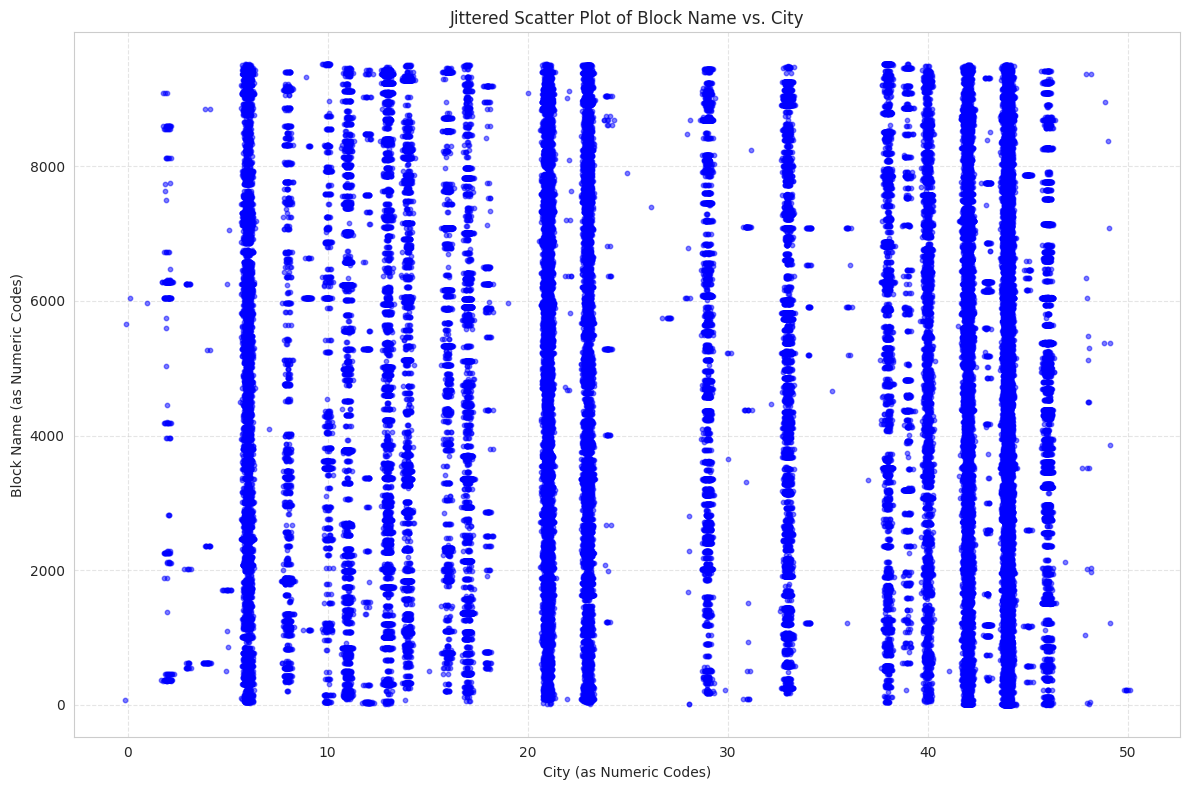

In [422]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assign numeric codes to City and Block Name
df['City_Code'] = df['City'].astype('category').cat.codes
df['Block_Code'] = df['Block Name'].astype('category').cat.codes

# Jittered Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(df['City_Code'] + np.random.normal(0, 0.1, size=len(df)),
            df['Block_Code'] + np.random.normal(0, 0.1, size=len(df)),
            alpha=0.5, s=10, c='blue')

# Set labels and title
plt.xlabel("City (as Numeric Codes)")
plt.ylabel("Block Name (as Numeric Codes)")
plt.title("Jittered Scatter Plot of Block Name vs. City")
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


In [370]:
# Extract the block name part after 'BLK' from the Block Address
df['Block Name'] = df['Block Address'].str.extract(r'BLK\s+(.+)', expand=False)

# Display the updated DataFrame to verify the Block Name extraction
print(df[['Block Address', 'Block Name']].head())


                Block Address         Block Name
0   12800 BLK  MIDDLEBROOK RD     MIDDLEBROOK RD
1      8300 BLK  WOODMONT AVE       WOODMONT AVE
2      8300 BLK  WOODMONT AVE       WOODMONT AVE
3  400 BLK  QUINCE ORCHARD RD  QUINCE ORCHARD RD
4      4800 BLK  FALSTONE AVE       FALSTONE AVE


In [371]:
# Group by Block Name and City to check how they are related
block_city_group = df.groupby(['Block Name', 'City']).size().reset_index(name='count')

# Display the relationships between Block Name and City
print(block_city_group.head(20))


    Block Name           City  count
0     10TH AVE  SILVER SPRING     21
1     11TH AVE  SILVER SPRING     86
2     12TH AVE  SILVER SPRING      1
3     13TH AVE    TAKOMA PARK     14
4      13TH PL    TAKOMA PARK      5
5      13TH ST  SILVER SPRING    508
6   13TH ST NW  SILVER SPRING      1
7   13TH ST NW     WASHINGTON      1
8     14TH AVE    TAKOMA PARK     15
9     16TH AVE    HYATTSVILLE      1
10     16TH ST  SILVER SPRING    557
11     1ST AVE  SILVER SPRING    175
12      1ST ST      ROCKVILLE    225
13    23RD AVE    HYATTSVILLE      1
14     270 HWY   GAITHERSBURG      1
15     270 HWY     GERMANTOWN      1
16     2ND AVE  SILVER SPRING    291
17     2ND AVE    TAKOMA PARK      3
18      2ND ST   GAITHERSBURG      1
19     3RD AVE  SILVER SPRING      6


In [372]:
# Create a dictionary to map Block Name to the most frequent City
block_to_city = df.groupby('Block Name')['City'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Fill missing City values using the Block Name
df['City'] = df.apply(lambda row: block_to_city.get(row['Block Name']) if pd.isnull(row['City']) else row['City'], axis=1)

# Verify the imputation
print(df[['Block Name', 'City']].head())


          Block Name          City
0     MIDDLEBROOK RD    GERMANTOWN
1       WOODMONT AVE      BETHESDA
2       WOODMONT AVE      BETHESDA
3  QUINCE ORCHARD RD  GAITHERSBURG
4       FALSTONE AVE   CHEVY CHASE


Unique City Codes: 51, Unique Block Codes: 9516
Pearson Correlation: -0.0009, p-value: 0.6577
Spearman Correlation: -0.0252, p-value: 0.0000
Chi-square Test: Chi2 = 7681212.6881, p-value = 0.0000


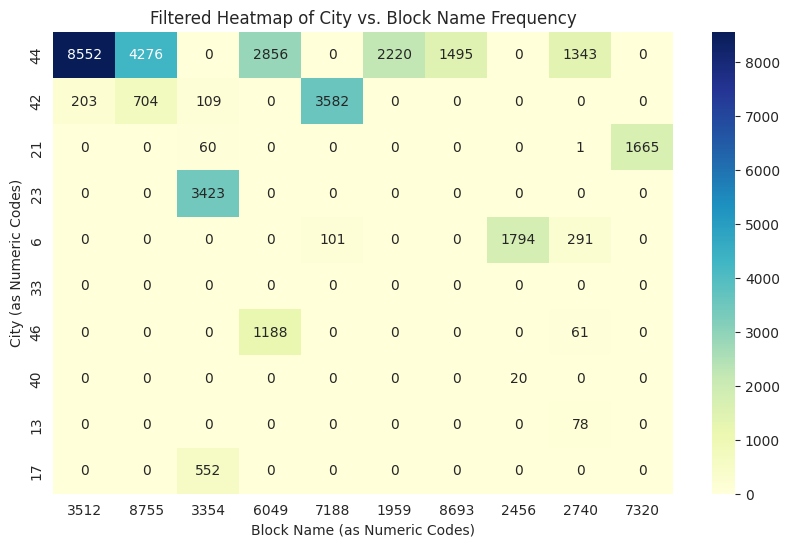

Statistically significant relationship between City and Block Name based on correlation tests.
Chi-square test shows a statistically significant dependency between City and Block Name.


In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Sample data generation (assuming df already has 'City' and 'Block Name')
# Encoding City and Block Name to numeric codes
df['City_Code'] = df['City'].astype('category').cat.codes
df['Block_Code'] = df['Block Name'].astype('category').cat.codes

# Check the unique counts to see if there's significant overlap
print(f"Unique City Codes: {df['City_Code'].nunique()}, Unique Block Codes: {df['Block_Code'].nunique()}")

# 1. Pearson and Spearman Correlations
pearson_corr, p_value_pearson = pearsonr(df['City_Code'], df['Block_Code'])
spearman_corr, p_value_spearman = spearmanr(df['City_Code'], df['Block_Code'])

print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {p_value_pearson:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {p_value_spearman:.4f}")

# 2. Chi-square Test of Independence
contingency_table = pd.crosstab(df['City_Code'], df['Block_Code'])

# Check if the contingency table is sparse
if contingency_table.values.sum() > 0:
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test: Chi2 = {chi2:.4f}, p-value = {p:.4f}")
else:
    print("Contingency table is too sparse for chi-square test.")

# 3. Adjusted Heatmap of the Contingency Table
# Optionally, filter to the top 10 City and Block codes with the highest frequency if data is sparse
top_cities = contingency_table.sum(axis=1).nlargest(10).index
top_blocks = contingency_table.sum(axis=0).nlargest(10).index
filtered_table = contingency_table.loc[top_cities, top_blocks]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel("Block Name (as Numeric Codes)")
plt.ylabel("City (as Numeric Codes)")
plt.title("Filtered Heatmap of City vs. Block Name Frequency")
plt.show()

# Interpretation of results based on p-values
if p_value_pearson < 0.05 or p_value_spearman < 0.05:
    print("Statistically significant relationship between City and Block Name based on correlation tests.")
else:
    print("No significant relationship based on correlation tests.")

if 'p' in locals() and p < 0.05:
    print("Chi-square test shows a statistically significant dependency between City and Block Name.")
else:
    print("Chi-square test shows no significant dependency between City and Block Name or data was too sparse.")


In [374]:
# Finding indices where 'Police District Name' is missing
missing_police_district_indices = df[df['Police District Name'].isnull()].index
missing_police_district_indices.tolist()
missing_police_district_indices.value_counts()


230       1
14422     1
15858     1
15688     1
15680     1
         ..
8361      1
8310      1
8218      1
8199      1
301305    1
Name: count, Length: 92, dtype: int64

Unique City Codes: 51, Unique Police District Codes: 9
Pearson Correlation: 0.6677, p-value: 0.0000
Spearman Correlation: 0.6644, p-value: 0.0000
Chi-square Test: Chi2 = 938023.7852, p-value = 0.0000


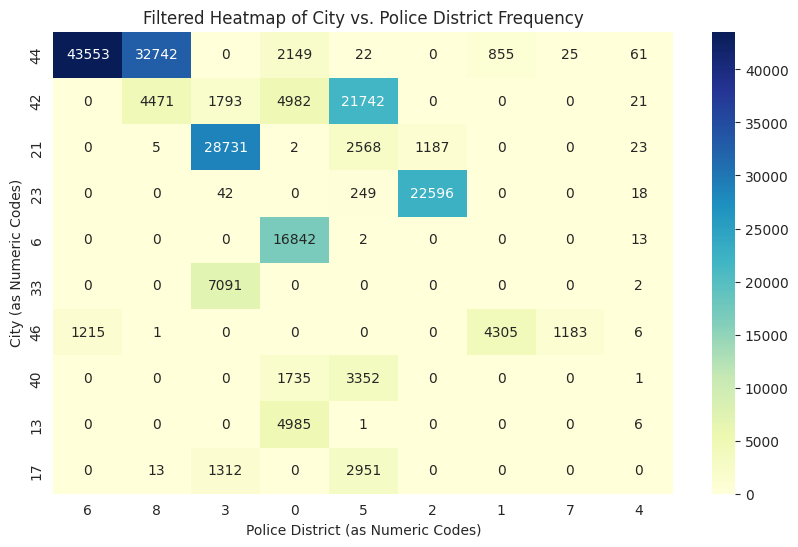

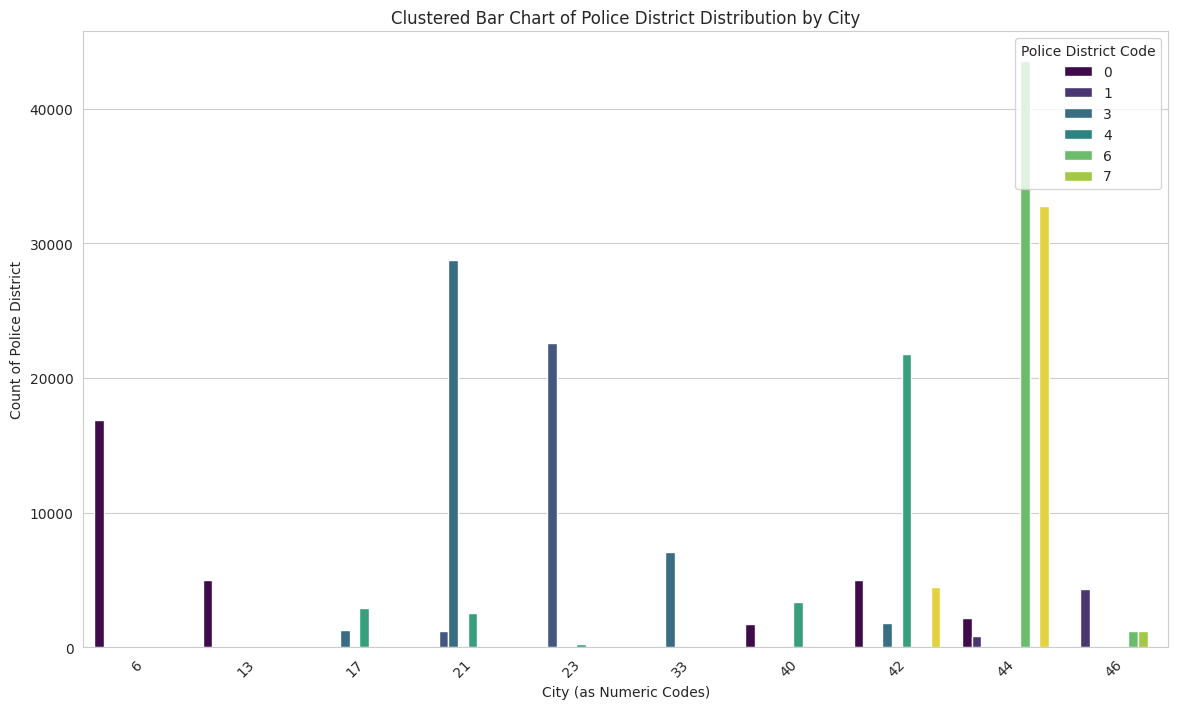

Statistically significant relationship between City and Police District Name based on correlation tests.
Chi-square test shows a statistically significant dependency between City and Police District Name.


In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Sample data preparation (assuming df already has 'City' and 'Police District Name')
# Encoding City and Police District Name to numeric codes
df['City_Code'] = df['City'].astype('category').cat.codes
df['Police_District_Code'] = df['Police District Name'].astype('category').cat.codes

# Check the unique counts to see if there's overlap
print(f"Unique City Codes: {df['City_Code'].nunique()}, Unique Police District Codes: {df['Police_District_Code'].nunique()}")

# 1. Pearson and Spearman Correlations
pearson_corr, p_value_pearson = pearsonr(df['City_Code'], df['Police_District_Code'])
spearman_corr, p_value_spearman = spearmanr(df['City_Code'], df['Police_District_Code'])

print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {p_value_pearson:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {p_value_spearman:.4f}")

# 2. Chi-square Test of Independence
contingency_table = pd.crosstab(df['City_Code'], df['Police_District_Code'])

# Check if the contingency table is sparse
if contingency_table.values.sum() > 0:
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test: Chi2 = {chi2:.4f}, p-value = {p:.4f}")
else:
    print("Contingency table is too sparse for chi-square test.")

# 3. Adjusted Heatmap of the Contingency Table
# Optionally, filter to the top 10 City and Police District codes if data is sparse
top_cities = contingency_table.sum(axis=1).nlargest(10).index
top_districts = contingency_table.sum(axis=0).nlargest(10).index
filtered_table = contingency_table.loc[top_cities, top_districts]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel("Police District (as Numeric Codes)")
plt.ylabel("City (as Numeric Codes)")
plt.title("Filtered Heatmap of City vs. Police District Frequency")
plt.show()

# 4. Clustered Bar Chart for Distribution Analysis
plt.figure(figsize=(14, 8))
# Filter top cities and top police districts for better visualization if needed
filtered_df = df[df['City_Code'].isin(top_cities) & df['Police_District_Code'].isin(top_districts)]
sns.countplot(data=filtered_df, x='City_Code', hue='Police_District_Code', palette="viridis")
plt.xlabel("City (as Numeric Codes)")
plt.ylabel("Count of Police District")
plt.title("Clustered Bar Chart of Police District Distribution by City")
plt.legend(title="Police District Code", loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Interpretation based on results
if p_value_pearson < 0.05 or p_value_spearman < 0.05:
    print("Statistically significant relationship between City and Police District Name based on correlation tests.")
else:
    print("No significant relationship based on correlation tests.")

if 'p' in locals() and p < 0.05:
    print("Chi-square test shows a statistically significant dependency between City and Police District Name.")
else:
    print("Chi-square test shows no significant dependency between City and Police District Name or data was too sparse.")


In [375]:
# Group by City and Police District Name to find the most frequent combinations
city_district_group = df.groupby(['City', 'Police District Name']).size().reset_index(name='count')

# Sort to see the most frequent police district for each city
city_district_group.sort_values(by=['City', 'count'], ascending=[True, False], inplace=True)

# Display the top combinations to verify the relationship
print(city_district_group.head(20))


            City Police District Name  count
0        ADELPHI        SILVER SPRING      2
1        ADELPHI          TAKOMA PARK      1
2     ALEXANDRIA                OTHER      1
3         ASHTON              WHEATON    278
4    BARNESVILLE           GERMANTOWN     30
5    BEALLSVILLE            ROCKVILLE     37
7     BELTSVILLE        SILVER SPRING     12
6     BELTSVILLE                OTHER      6
8       BETHESDA             BETHESDA  16842
9       BETHESDA                OTHER     13
10      BETHESDA            ROCKVILLE      2
11         BOWIE   MONTGOMERY VILLAGE      1
12         BOYDS           GERMANTOWN   1584
13         BOYDS            ROCKVILLE     24
14      BRINKLOW              WHEATON     58
16   BROOKEVILLE              WHEATON    722
15   BROOKEVILLE           GERMANTOWN     10
18  BURTONSVILLE        SILVER SPRING   2822
17  BURTONSVILLE                OTHER      4
19    CABIN JOHN             BETHESDA    177


In [376]:
# Create a dictionary to map City to the most frequent Police District Name
city_to_district = df.groupby('City')['Police District Name'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Display the mapping to verify
print(city_to_district)


{'ADELPHI': 'SILVER SPRING', 'ALEXANDRIA': 'OTHER', 'ASHTON': 'WHEATON', 'BARNESVILLE': 'GERMANTOWN', 'BEALLSVILLE': 'ROCKVILLE', 'BELTSVILLE': 'SILVER SPRING', 'BETHESDA': 'BETHESDA', 'BOWIE': 'MONTGOMERY VILLAGE', 'BOYDS': 'GERMANTOWN', 'BRINKLOW': 'WHEATON', 'BROOKEVILLE': 'WHEATON', 'BURTONSVILLE': 'SILVER SPRING', 'CABIN JOHN': 'BETHESDA', 'CHEVY CHASE': 'BETHESDA', 'CLARKSBURG': 'GERMANTOWN', 'COLLEGE PARK': 'OTHER', 'DAMASCUS': 'GERMANTOWN', 'DERWOOD': 'ROCKVILLE', 'DICKERSON': 'GERMANTOWN', 'FALLS CHURCH': 'OTHER', 'FREDERICK': 'WHEATON', 'GAITHERSBURG': 'MONTGOMERY VILLAGE', 'GARRETT PARK': 'BETHESDA', 'GERMANTOWN': 'GERMANTOWN', 'GLEN ECHO': 'BETHESDA', 'GREENBELT': 'MONTGOMERY VILLAGE', 'HAGERSTOWN': 'MONTGOMERY VILLAGE', 'HIGHLAND': 'WHEATON', 'HYATTSVILLE': 'OTHER', 'KENSINGTON': 'BETHESDA', 'LANHAM': 'SILVER SPRING', 'LAUREL': 'SILVER SPRING', 'MCLEAN': 'OTHER', 'MONTGOMERY VILLAGE': 'MONTGOMERY VILLAGE', 'MOUNT AIRY': 'GERMANTOWN', 'MOUNT RAINIER': 'OTHER', 'MT AIRY': 'G

In [377]:
# Fill missing Police District Name values using the most frequent district for each city
df['Police District Name'] = df.apply(lambda row: city_to_district.get(row['City']) if pd.isnull(row['Police District Name']) else row['Police District Name'], axis=1)

# Verify the imputation
print(df[['City', 'Police District Name']].head())

           City Police District Name
0    GERMANTOWN           GERMANTOWN
1      BETHESDA             BETHESDA
2      BETHESDA             BETHESDA
3  GAITHERSBURG   MONTGOMERY VILLAGE
4   CHEVY CHASE             BETHESDA


Unique Block Codes: 9516, Unique Zip Codes: 82
Pearson Correlation: -0.0601, p-value: 0.0000
Spearman Correlation: -0.0693, p-value: 0.0000
Chi-square Test: Chi2 = 12581614.2046, p-value = 0.0000


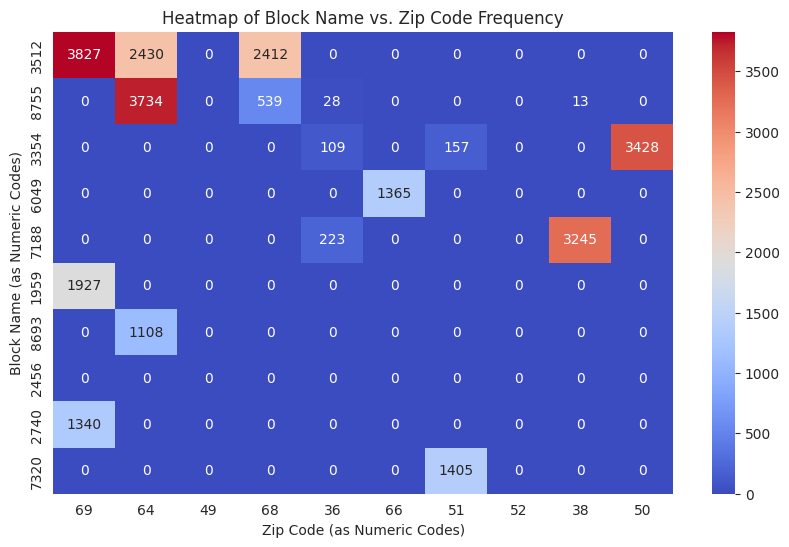

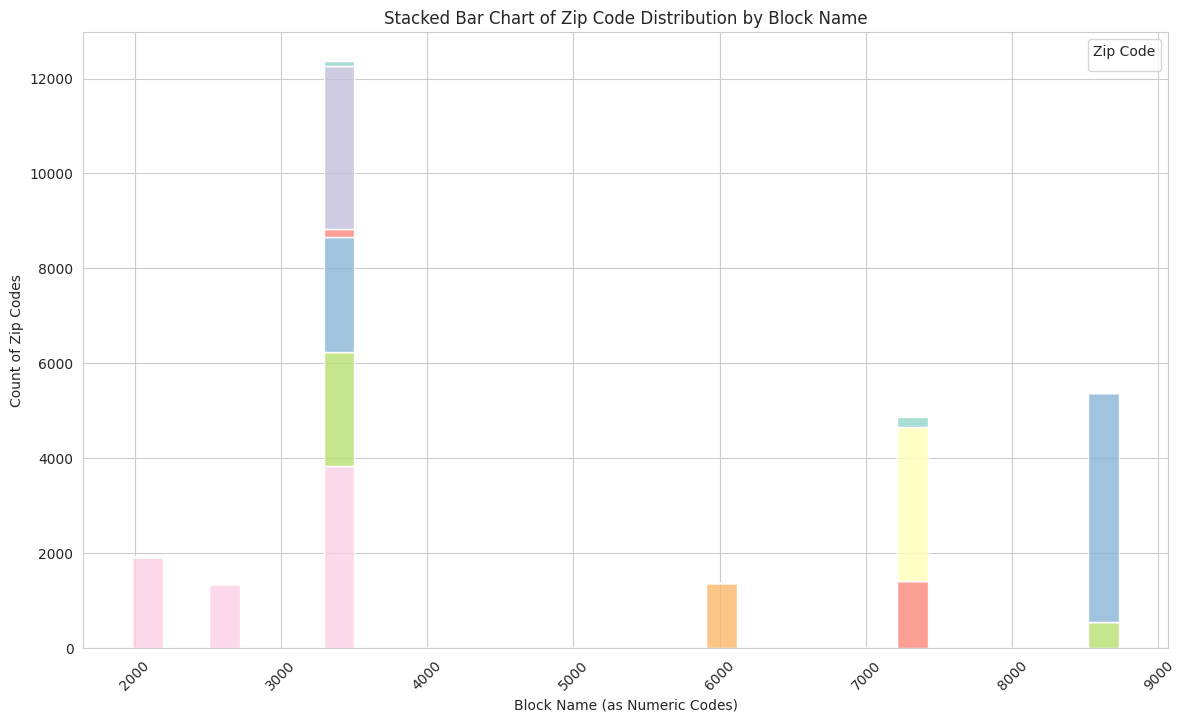

Statistically significant relationship between Block Name and Zip Code based on correlation tests.
Chi-square test shows a statistically significant dependency between Block Name and Zip Code.


In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Encode Block Name and Zip Code as numeric codes for correlation analysis
df['Block_Code'] = df['Block Name'].astype('category').cat.codes
df['Zip_Code'] = df['Zip Code'].astype('category').cat.codes

# Check unique counts for Block Name and Zip Code
print(f"Unique Block Codes: {df['Block_Code'].nunique()}, Unique Zip Codes: {df['Zip_Code'].nunique()}")

# 1. Pearson and Spearman Correlations
pearson_corr, p_value_pearson = pearsonr(df['Block_Code'], df['Zip_Code'])
spearman_corr, p_value_spearman = spearmanr(df['Block_Code'], df['Zip_Code'])

print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {p_value_pearson:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {p_value_spearman:.4f}")

# 2. Chi-square Test of Independence
contingency_table = pd.crosstab(df['Block_Code'], df['Zip_Code'])

# Check if the contingency table is sparse
if contingency_table.values.sum() > 0:
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test: Chi2 = {chi2:.4f}, p-value = {p:.4f}")
else:
    print("Contingency table is too sparse for chi-square test.")

# 3. Heatmap of the Contingency Table (Top 10 Blocks and Zip Codes by frequency)
top_blocks = contingency_table.sum(axis=1).nlargest(10).index
top_zip_codes = contingency_table.sum(axis=0).nlargest(10).index
filtered_table = contingency_table.loc[top_blocks, top_zip_codes]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.xlabel("Zip Code (as Numeric Codes)")
plt.ylabel("Block Name (as Numeric Codes)")
plt.title("Heatmap of Block Name vs. Zip Code Frequency")
plt.show()

# 4. Stacked Bar Chart to show the proportion of Zip Codes within each Block Name
# Filter the dataframe to top blocks and zip codes for readability
filtered_df = df[df['Block_Code'].isin(top_blocks) & df['Zip_Code'].isin(top_zip_codes)]

plt.figure(figsize=(14, 8))
sns.histplot(data=filtered_df, x='Block_Code', hue='Zip_Code', multiple='stack', palette="Set3", shrink=0.8)
plt.xlabel("Block Name (as Numeric Codes)")
plt.ylabel("Count of Zip Codes")
plt.title("Stacked Bar Chart of Zip Code Distribution by Block Name")
plt.xticks(rotation=45)
plt.legend(title="Zip Code", loc='upper right')
plt.show()

# Interpretation based on results
if p_value_pearson < 0.05 or p_value_spearman < 0.05:
    print("Statistically significant relationship between Block Name and Zip Code based on correlation tests.")
else:
    print("No significant relationship based on correlation tests.")

if 'p' in locals() and p < 0.05:
    print("Chi-square test shows a statistically significant dependency between Block Name and Zip Code.")
else:
    print("Chi-square test shows no significant dependency between Block Name and Zip Code or data was too sparse.")


In [378]:
# Group by City and Zip Code to understand the relationship
city_zip_group = df.groupby(['Block Name', 'Zip Code']).size().reset_index(name='count')

# Sort the values to see the most frequent zip codes for each city
city_zip_group.sort_values(by=['Block Name', 'count'], ascending=[True, False], inplace=True)

# Display the top combinations
print(city_zip_group)

       Block Name  Zip Code  count
0        10TH AVE   20903.0     21
1        11TH AVE   20903.0     86
2        12TH AVE   20903.0      1
3        13TH AVE   20912.0     14
4         13TH PL   20912.0      5
...           ...       ...    ...
10075  ZINNIA CIR   20876.0     38
10076     ZION RD   20833.0    128
10077     ZION RD   20882.0      6
10078   ZULIMA CT   20817.0      3
10079    ZULLO DR   20837.0      3

[10080 rows x 3 columns]


In [379]:
# Create a dictionary to map City to the most frequent Zip Code
city_to_zip = df.groupby('Block Name')['Zip Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Display the mapping to verify
print(city_to_zip)

{'10TH AVE': 20903.0, '11TH AVE': 20903.0, '12TH AVE': 20903.0, '13TH AVE': 20912.0, '13TH PL': 20912.0, '13TH ST': 20910.0, '13TH ST NW': 20004.0, '14TH AVE': 20912.0, '16TH AVE': 20782.0, '16TH ST': 20910.0, '1ST AVE': 20910.0, '1ST ST': 20850.0, '23RD AVE': 20783.0, '270 HWY': 20877.0, '2ND AVE': 20910.0, '2ND ST': 20882.0, '3RD AVE': 20910.0, '44TH ST': 20815.0, '45TH ST': 20815.0, '46TH ST': 20815.0, '47TH ST': 20815.0, '4TH AVE': 20912.0, '5TH AVE': 20912.0, '63RD ST': 20816.0, '6TH AVE': 20880.0, '6TH ST NE': 20002.0, '75TH PL': 20818.0, '75TH ST': 20818.0, '76TH PL': 20818.0, '76TH ST': 20818.0, '77TH ST': 20818.0, '78TH ST': 20818.0, '79TH PL': 20818.0, '79TH ST': 20818.0, '7TH ST NW': 20001.0, '80TH ST': 20818.0, '81ST ST': 20818.0, '82ND PL': 20818.0, '83RD PL': 20818.0, 'ABBEY MANOR CIR': 20833.0, 'ABBEY MANOR DR': 20833.0, 'ABBEY MANOR TER': 20833.0, 'ABBEY STATION LA': 20901.0, 'ABBEY TER': 20854.0, 'ABBEYVILLE PL': 20832.0, 'ABBOTSFORD CIR': 20876.0, 'ABBOTT RD': 20851.0

In [380]:
# Fill missing Zip Code values using the most frequent Zip Code for each city
df['Zip Code'] = df.apply(lambda row: city_to_zip.get(row['Block Name']) if pd.isnull(row['Zip Code']) else row['Zip Code'], axis=1)

# Verify the imputation
print(df[['Block Name', 'Zip Code']].head())

          Block Name  Zip Code
0     MIDDLEBROOK RD   20874.0
1       WOODMONT AVE   20814.0
2       WOODMONT AVE   20814.0
3  QUINCE ORCHARD RD   20878.0
4       FALSTONE AVE   20815.0


In [381]:
# Drop rows with missing values in the 'Beat' and 'Sector' columns
df_cleaned = df.dropna(subset=['Beat', 'Sector', 'PRA','Zip Code'])

# Check the updated DataFrame for missing values
print(df_cleaned.isnull().sum())

Incident ID                    0
Offence Code                   0
CR Number                      0
NIBRS Code                     0
Victims                        0
Crime Name1                  261
Crime Name2                  261
Crime Name3                  261
Police District Name           0
Block Address                  0
City                           0
State                          0
Zip Code                       0
Agency                         0
Place                          0
Sector                         0
Beat                           0
PRA                            0
Address Number                 0
Street Name                    0
Street Type                    0
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
Start Date                     0
Start Time                     0
Dispatch Date                  0
Dispatch Time                  0
End Date                       0
End Time  

Percentage of missing values in each feature with missing values:
Crime Name1         0.113146
Crime Name2         0.113146
Crime Name3         0.113146
Resolution Time    51.668798
dtype: float64


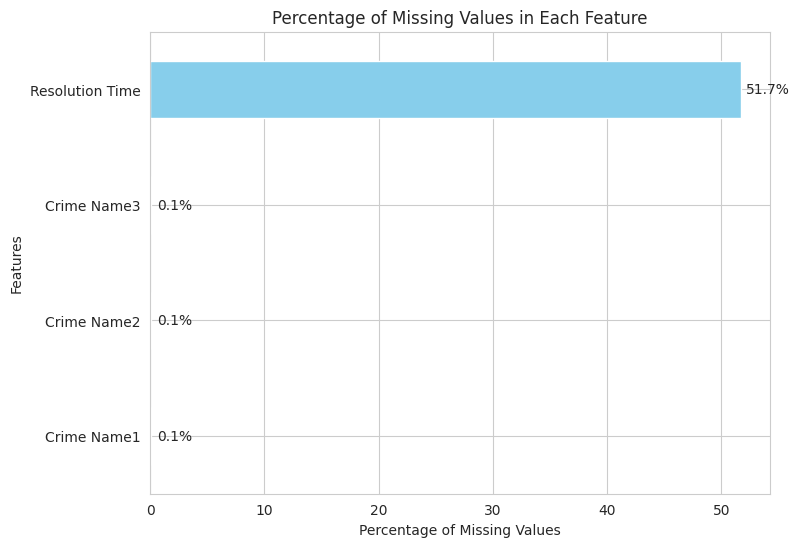

In [382]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the total number of rows
total_rows = df_cleaned.shape[0]

# Check for missing values in each feature
missing_values = df_cleaned.isnull().sum()

# Filter features that contain missing values
features_with_missing = missing_values[missing_values > 0]

# Calculate the percentage of missing values in each feature
percentage_missing = (features_with_missing / total_rows) * 100

# Display the percentage of missing values in each feature
print("Percentage of missing values in each feature with missing values:")
print(percentage_missing)

# Plotting the bar graph
# Horizontal Bar Chart with Values
plt.figure(figsize=(8, 6))
ax = percentage_missing.plot(kind='barh', color='skyblue')

# Adding labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Percentage of Missing Values in Each Feature')

# Annotating the bars with the percentage values
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + i.get_height() / 2,
            f'{i.get_width():.1f}%', va='center', fontsize=10)

plt.show()

<ipython-input-383-08a89979fde8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Resolution Time (hours)'] = df_cleaned['Resolution Time'].dt.total_seconds() / 3600  # Convert to hours
<ipython-input-383-08a89979fde8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Resolution Category'] = df_cleaned['Resolution Time (hours)'].apply(


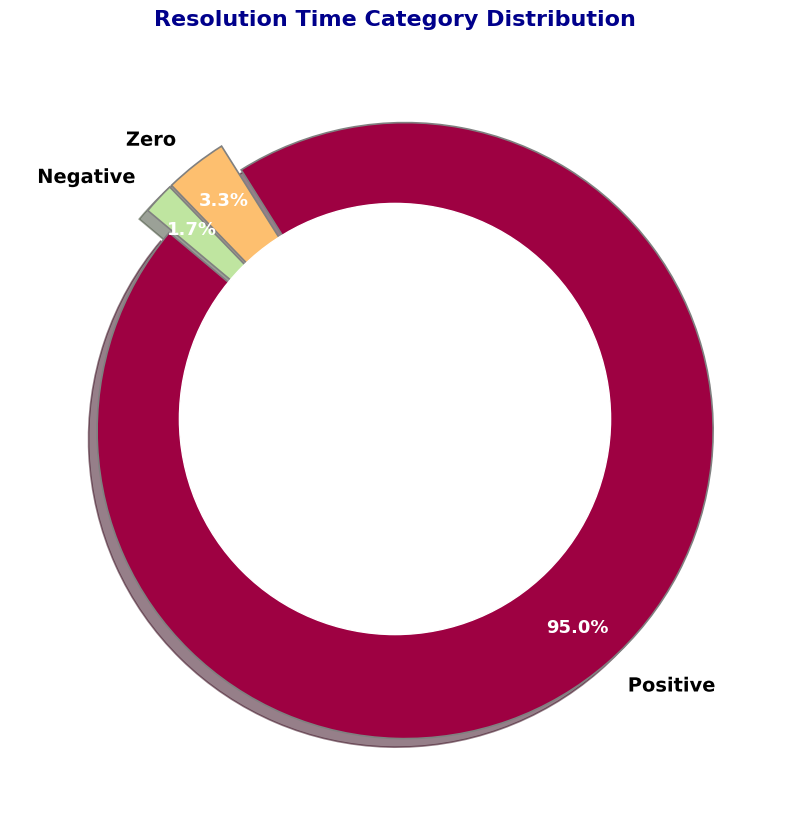

In [383]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.patheffects as pe
# First, convert Resolution Time to total hours as a new column
df_cleaned['Resolution Time (hours)'] = df_cleaned['Resolution Time'].dt.total_seconds() / 3600  # Convert to hours

# Categorize resolution times using .loc to avoid warnings
df_cleaned.loc[:, 'Resolution Category'] = df_cleaned['Resolution Time (hours)'].apply(
    lambda x: 'Zero' if x == 0 else ('Negative' if x < 0 else 'Positive')
)

# Count each category
resolution_counts = df_cleaned['Resolution Category'].value_counts()

# Use an updated color map
color_map = plt.colormaps['Spectral']
colors = [color_map(i / 3) for i in range(3)]  # Generate three distinct colors

# Create the pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    resolution_counts,
    labels=resolution_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.05, 0.05, 0.05),   # Small explosion for each slice
    pctdistance=0.85,
    shadow=True,
    wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2}
)

# Style the text annotations
for text in texts:
    text.set_fontsize(14)
    text.set_weight("bold")
    text.set_color("black")
    text.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])  # Add shadow effect

# Set the color of the percentages to white
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_weight("bold")
    autotext.set_color("white")

# Add a circle at the center to create a "donut" effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Add a title
plt.title('Resolution Time Category Distribution', fontsize=16, fontweight='bold', color="darkblue")

plt.show()


# Visualization Questions and Visualizations.

## 1.Which sectors handle incidents most effectively in terms of Resolution Time?

<ipython-input-384-7e41a8340fc6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


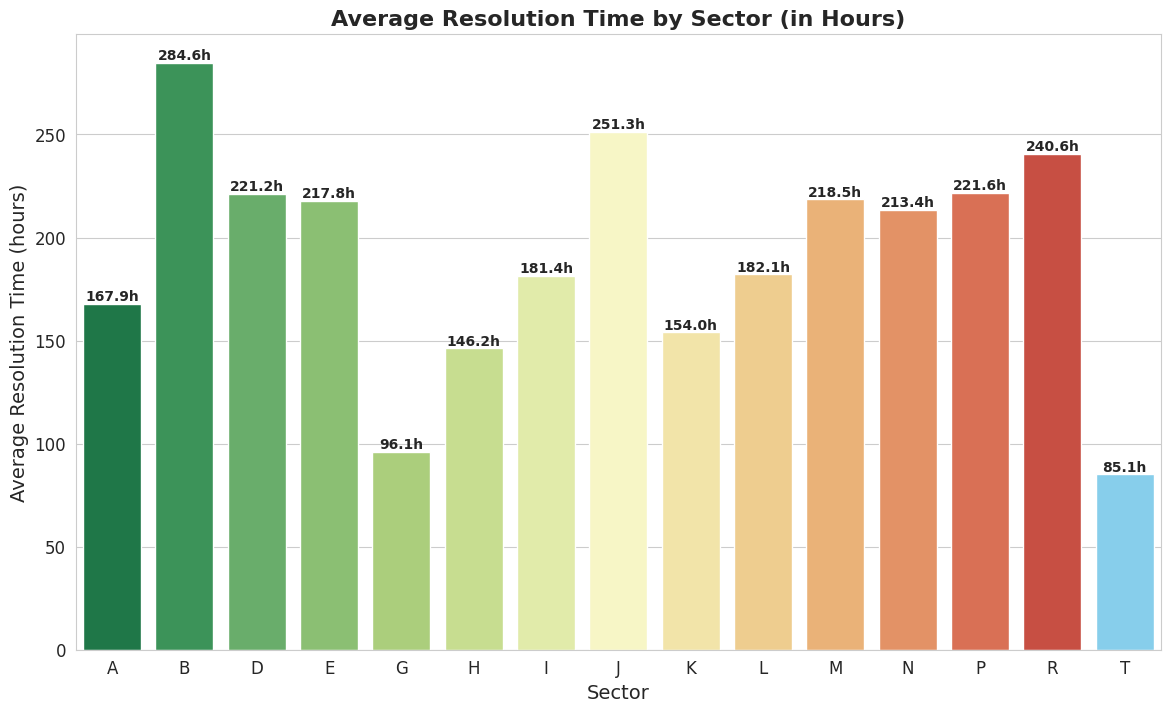

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for better aesthetics
sns.set_style("whitegrid")

# Calculate average resolution time by sector
sector_avg_resolution_time = df_cleaned.groupby('Sector')['Resolution Time (hours)'].mean().reset_index()

# Identify the most efficient sector for highlighting
min_resolution_time = sector_avg_resolution_time['Resolution Time (hours)'].min()
highlighted_color = "skyblue"

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=sector_avg_resolution_time,
    x='Sector',
    y='Resolution Time (hours)',
    palette="RdYlGn_r"  # Color gradient from green to red
)

# Add data labels and color highlighting
for index, row in sector_avg_resolution_time.iterrows():
    bar_plot.text(
        index,
        row['Resolution Time (hours)'] + 0.1,  # Adjust label position
        f"{row['Resolution Time (hours)']:.1f}h",
        ha='center',
        va='bottom',
        fontweight='bold'
    )
    # Highlight the sector with the shortest resolution time
    if row['Resolution Time (hours)'] == min_resolution_time:
        bar_plot.patches[index].set_facecolor(highlighted_color)

# Adjust labels and add a title
plt.title('Average Resolution Time by Sector (in Hours)', fontsize=16, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Average Resolution Time (hours)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


<ipython-input-385-51a51ed91cb1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(


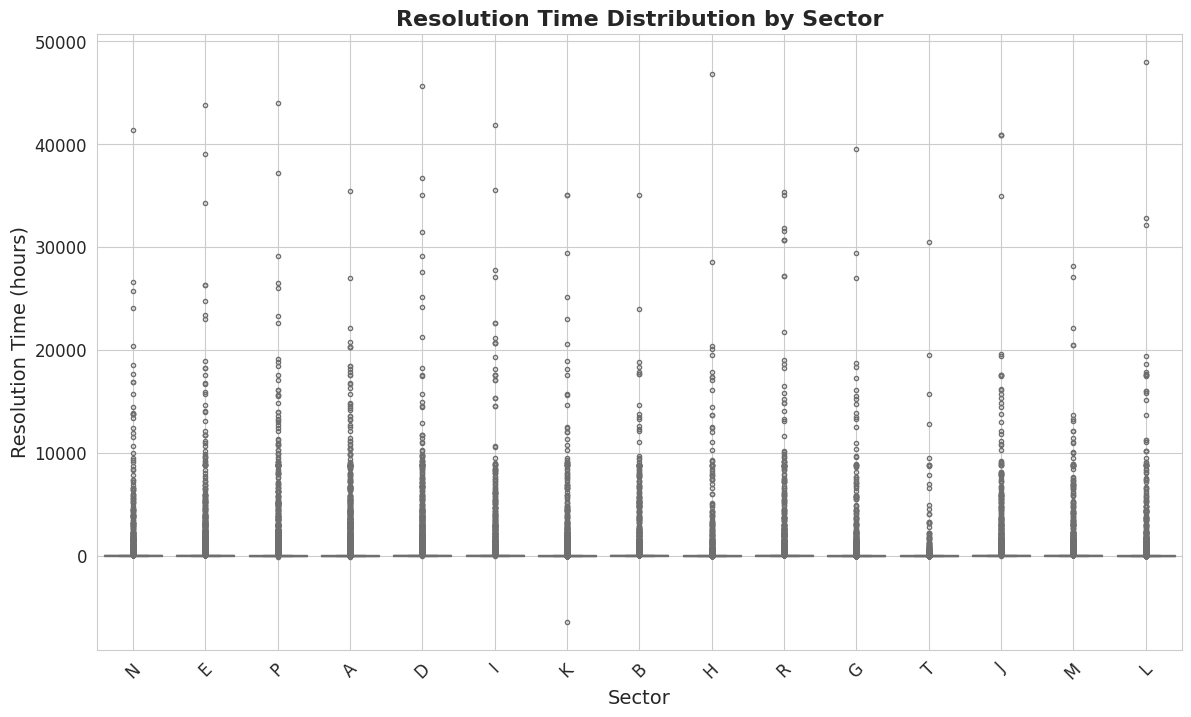

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Box plot for Resolution Time by Sector
box_plot = sns.boxplot(
    data=df_cleaned,
    x='Sector',
    y='Resolution Time (hours)',
    palette="pastel",  # Use a softer color palette
    fliersize=3        # Adjusts the size of outliers if any
)

# Enhancing the plot with title, labels, and grid
plt.title('Resolution Time Distribution by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Resolution Time (hours)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for better readability
plt.grid(True)

plt.show()


In [386]:
# Filter out entries with zero or negative Resolution Time (in hours)
anomalies = df_cleaned[df_cleaned['Resolution Time (hours)'] < 0]

# Display the rows with zero or negative resolution time for review
print("Zero or Negative Resolution Time Entries:\n", anomalies[['Incident ID', 'Resolution Time', 'Resolution Time (hours)', 'Sector', 'City']])

# Check the count of anomalies
print(f"Total count of zero or negative resolution times: {len(anomalies)}")


Zero or Negative Resolution Time Entries:
         Incident ID   Resolution Time  Resolution Time (hours) Sector  \
76        201260671 -1 days +19:45:00                -4.250000      G   
85        201269179 -1 days +09:32:00               -14.466667      P   
105       201274382 -1 days +08:38:00               -15.366667      P   
183       201256120 -1 days +02:20:00               -21.666667      K   
235       201230042 -1 days +14:50:00                -9.166667      B   
...             ...               ...                      ...    ...   
305733    201321604 -1 days +12:23:00               -11.616667      P   
305849    201329936 -1 days +10:59:00               -13.016667      A   
305982    201329809 -1 days +12:51:00               -11.150000      K   
305991    201321689 -1 days +04:22:00               -19.633333      K   
306058    201319807 -1 days +04:54:00               -19.100000      J   

                 City  
76      SILVER SPRING  
85       GAITHERSBURG  
105     

## 2.**Are** there specific times of day when incidents occur more frequently?

<ipython-input-387-6dc7ea8b4986>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Start Date'] = pd.to_datetime(df_cleaned['Start Date'], errors='coerce')
<ipython-input-387-6dc7ea8b4986>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Start Time'] = pd.to_datetime(df_cleaned['Start Time'], errors='coerce').dt.time
<ipython-input-387-6dc7ea8b4986>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

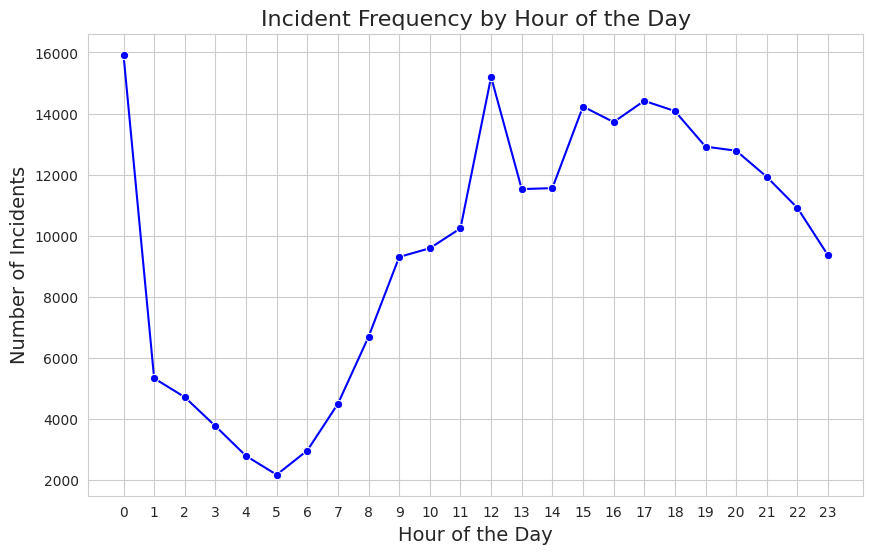

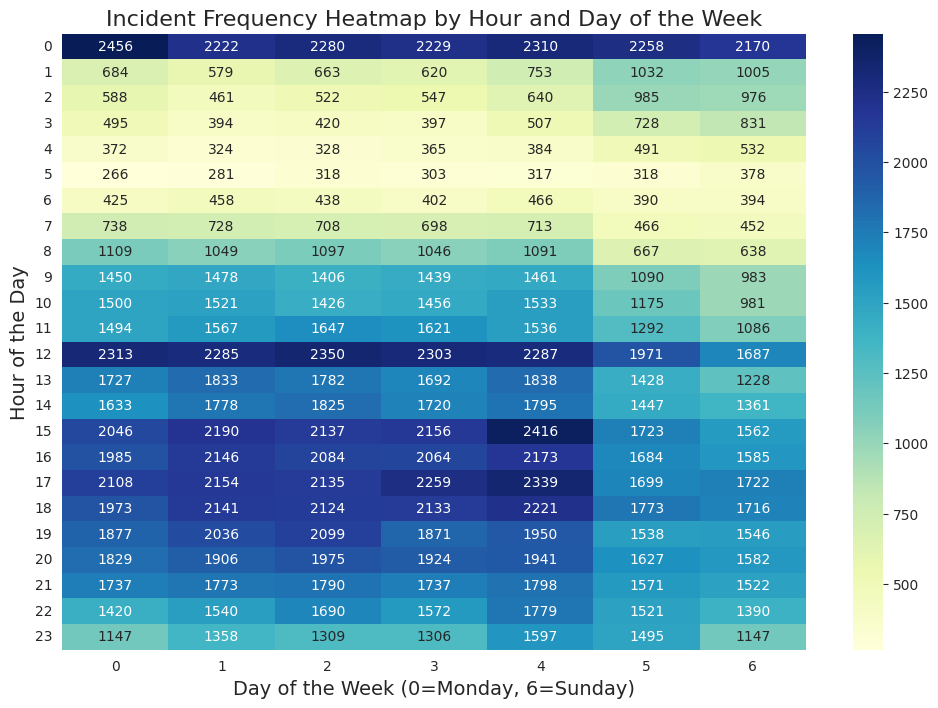

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Start Date' and 'Start Time' are datetime
df_cleaned['Start Date'] = pd.to_datetime(df_cleaned['Start Date'], errors='coerce')
df_cleaned['Start Time'] = pd.to_datetime(df_cleaned['Start Time'], errors='coerce').dt.time

# Combine 'Start Date' and 'Start Time' into a single datetime if needed
df_cleaned['Start DateTime'] = pd.to_datetime(df_cleaned['Start Date'].astype(str) + ' ' + df_cleaned['Start Time'].astype(str), errors='coerce')

# Extract hour and day of the week from the combined datetime
df_cleaned['Start Hour'] = df_cleaned['Start DateTime'].dt.hour
df_cleaned['Day of Week'] = df_cleaned['Start DateTime'].dt.dayofweek

# 1. Line Chart of Incident Frequency by Hour
hourly_counts = df_cleaned['Start Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='blue')
plt.title('Incident Frequency by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(range(24))
plt.grid(True)
plt.show()

# 2. Heatmap of Incident Frequency by Hour and Day of the Week
heatmap_data = df_cleaned.pivot_table(index='Start Hour', columns='Day of Week', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d', cbar=True)
plt.title('Incident Frequency Heatmap by Hour and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [388]:
import geopandas as gpd
from shapely.geometry import Point

# Select the relevant columns from your DataFrame
df_zip = df_cleaned[['Zip Code', 'Longitude', 'Latitude']]  # Corrected this line

# Create a geometry column
geometry = [Point(xy) for xy in zip(df_zip['Longitude'], df_zip['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_zip, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = 'EPSG:4326'  # WGS 84

# Save the GeoDataFrame as a shapefile
gdf.to_file('output_file.shp', driver='ESRI Shapefile')

print("Shapefile created successfully!")



Shapefile created successfully!


## 3.⁠Which police districts or agencies have the most missing Resolution Time entries?
Visualizations:


<ipython-input-389-57e64b684920>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Police District Name', y='Missing Resolution Time Count', data=missing_resolution_counts, palette='viridis')


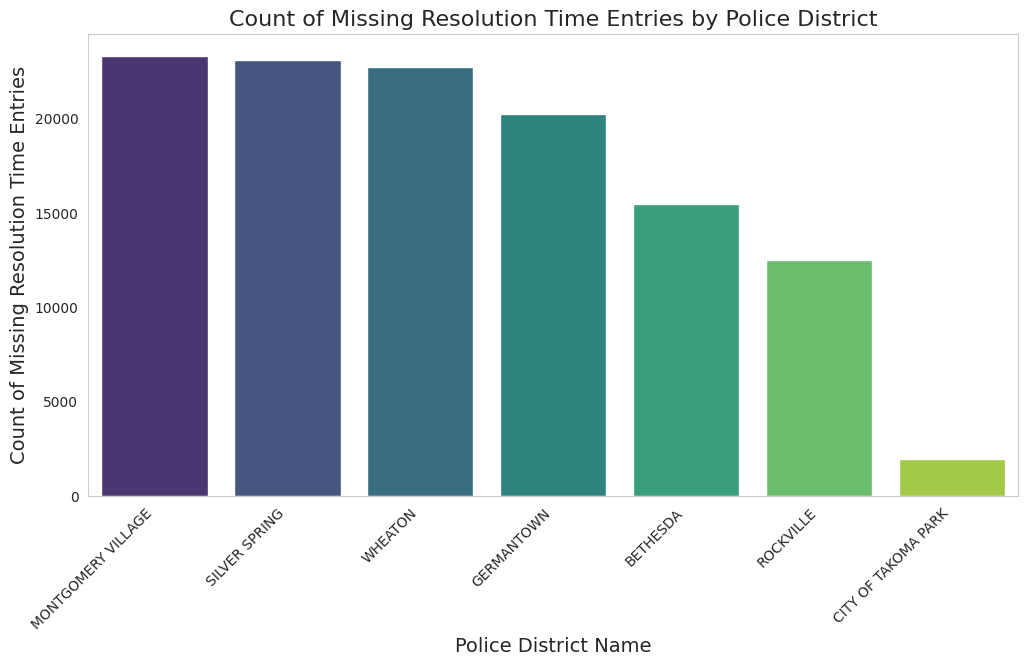

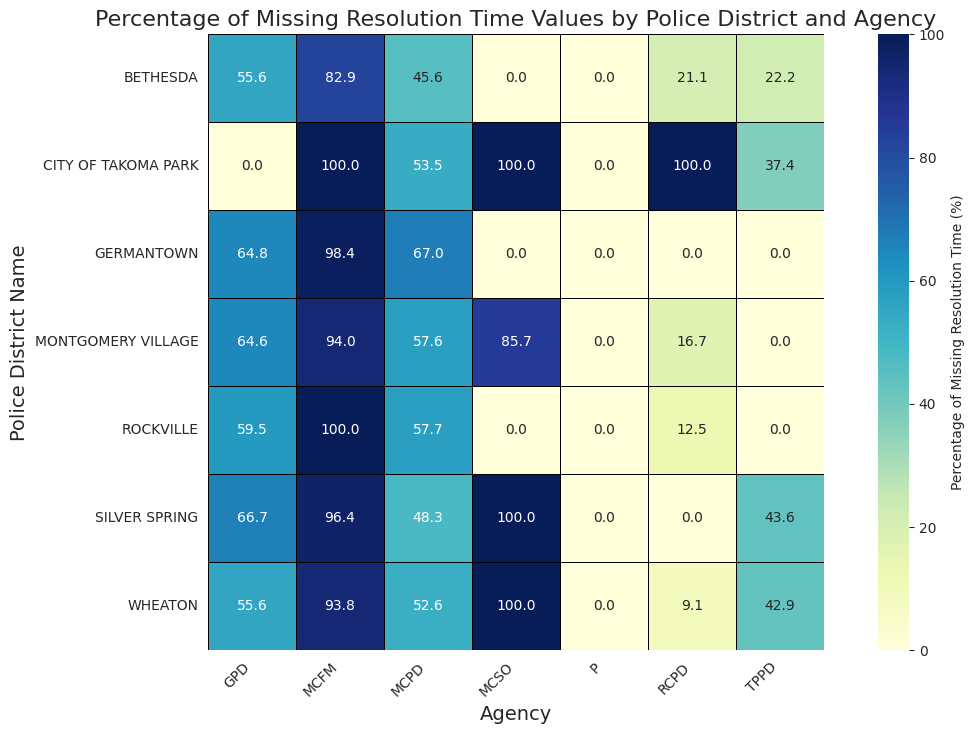

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (replace this with your actual DataFrame)
# df_cleaned = pd.read_csv('your_data.csv')  # Load your data

# Check if the DataFrame is not empty
if df_cleaned.empty:
    raise ValueError("The DataFrame is empty. Please check your data.")

# 1. Count of Missing Resolution Time Entries by Police District
missing_resolution_counts = df_cleaned[df_cleaned['Resolution Time'].isnull()]['Police District Name'].value_counts().reset_index()
missing_resolution_counts.columns = ['Police District Name', 'Missing Resolution Time Count']

# 2. Create Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Police District Name', y='Missing Resolution Time Count', data=missing_resolution_counts, palette='viridis')
plt.title('Count of Missing Resolution Time Entries by Police District', fontsize=16)
plt.xlabel('Police District Name', fontsize=14)
plt.ylabel('Count of Missing Resolution Time Entries', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 3. Calculate Percentage of Missing Resolution Time Values
total_counts = df_cleaned.groupby(['Police District Name', 'Agency']).size().reset_index(name='Total Count')
missing_counts = df_cleaned[df_cleaned['Resolution Time'].isnull()].groupby(['Police District Name', 'Agency']).size().reset_index(name='Missing Count')

# Merge both counts to calculate percentage
merged_counts = pd.merge(total_counts, missing_counts, on=['Police District Name', 'Agency'], how='left').fillna(0)
merged_counts['Missing Percentage'] = (merged_counts['Missing Count'] / merged_counts['Total Count']) * 100

# 4. Create Heatmap
heatmap_data = merged_counts.pivot(index='Police District Name', columns='Agency', values='Missing Percentage').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage of Missing Resolution Time (%)'},
            linewidths=0.5, linecolor='black', square=True, cbar=True)

plt.title('Percentage of Missing Resolution Time Values by Police District and Agency', fontsize=16)
plt.xlabel('Agency', fontsize=14)
plt.ylabel('Police District Name', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # Rotate y-ticks for better visibility
plt.show()


## 4.How does the time required to respond (Dispatch Date/Time to Start Date/Time) vary by Beat?
Visualizations

<ipython-input-390-1d454819a546>:5: DtypeWarning: Columns (1,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('/content/drive/MyDrive/cleaned_dataset (1).csv')
<ipython-input-390-1d454819a546>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Dispatch Time'] = pd.to_datetime(df_cleaned['Dispatch Time'], errors='coerce').dt.time
<ipython-input-390-1d454819a546>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Start Time'] = pd.to_datetime(df_cleaned['Start Time'], errors='coerce').dt.time
<ipython-input-390-1d454819a546>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

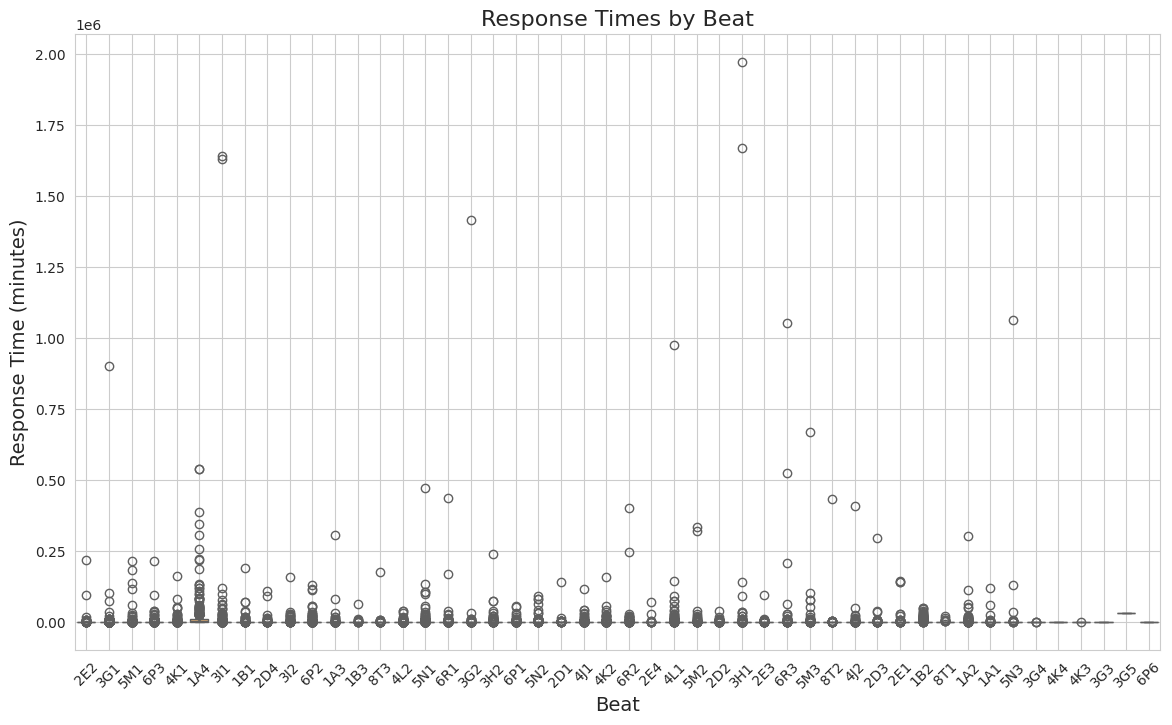

<ipython-input-390-1d454819a546>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_response_time, x='Beat', y='Response Time', palette='viridis')


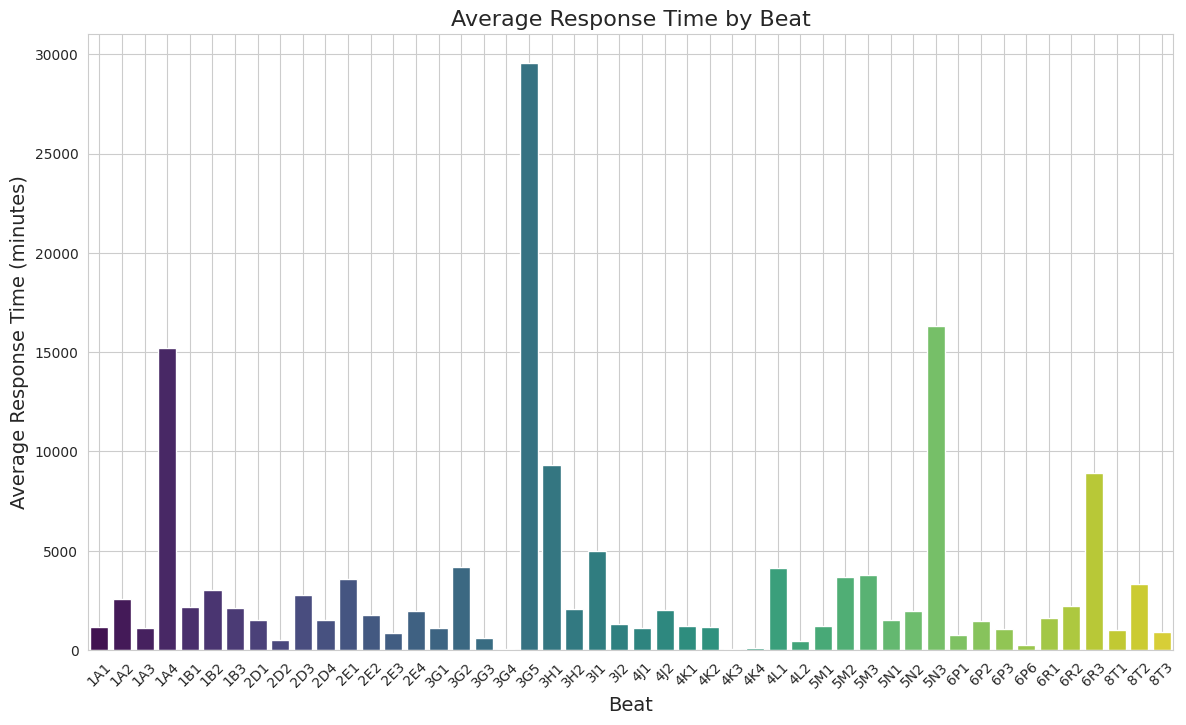

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv('/content/drive/MyDrive/cleaned_dataset (1).csv')

# Ensure that date columns are in datetime format and time columns are treated as strings
df_cleaned['Dispatch Date'] = pd.to_datetime(df_cleaned['Dispatch Date'], errors='coerce').dt.date
df_cleaned['Start Date'] = pd.to_datetime(df_cleaned['Start Date'], errors='coerce').dt.date
df_cleaned['Dispatch Time'] = pd.to_datetime(df_cleaned['Dispatch Time'], errors='coerce').dt.time
df_cleaned['Start Time'] = pd.to_datetime(df_cleaned['Start Time'], errors='coerce').dt.time

# Convert dates and times to strings before concatenating
df_cleaned['Dispatch DateTime'] = pd.to_datetime(df_cleaned['Dispatch Date'].astype(str) + ' ' + df_cleaned['Dispatch Time'].astype(str), errors='coerce')
df_cleaned['Start DateTime'] = pd.to_datetime(df_cleaned['Start Date'].astype(str) + ' ' + df_cleaned['Start Time'].astype(str), errors='coerce')

# Calculate response time in minutes
df_cleaned['Response Time'] = (df_cleaned['Start DateTime'] - df_cleaned['Dispatch DateTime']).dt.total_seconds() / 60

# Filter out rows with negative response times and drop rows with null values if any
df_cleaned = df_cleaned[(df_cleaned['Response Time'] > 0) & df_cleaned['Response Time'].notna()]

# 1. Box Plot of Response Times by Beat
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='Beat', y='Response Time', palette='Set3')
plt.title('Response Times by Beat', fontsize=16)
plt.xlabel('Beat', fontsize=14)
plt.ylabel('Response Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Bar Chart of Average Response Time by Beat
average_response_time = df_cleaned.groupby('Beat')['Response Time'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=average_response_time, x='Beat', y='Response Time', palette='viridis')
plt.title('Average Response Time by Beat', fontsize=16)
plt.xlabel('Beat', fontsize=14)
plt.ylabel('Average Response Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [391]:
# Drop rows where Crime Name1 has NaN values
df_cleaned = df.dropna(subset=['Crime Name1']).reset_index(drop=True)

# Check if there are still NaN values in the column
print(f"Remaining NaN values in 'Crime Name1': {df_cleaned['Crime Name1'].isna().sum()}")

# Display the first few rows to verify the data after cleaning
df_cleaned.head()


Remaining NaN values in 'Crime Name1': 0


Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0    201202980         3550  180042096        35B        1   
1    201181293         3522  180015424        35A        1   
2    201181293         3562  180015424        35A        1   
3    201193163         3520  180029476        35A        1   
4    201204355         2204  180043926        220        1   

              Crime Name1                     Crime Name2  \
0   Crime Against Society       Drug Equipment Violations   
1   Crime Against Society        Drug/Narcotic Violations   
2   Crime Against Society        Drug/Narcotic Violations   
3   Crime Against Society        Drug/Narcotic Violations   
4  Crime Against Property  Burglary/Breaking and Entering   

                              Crime Name3 Police District Name  \
0        DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
1   DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA   
2             DRUGS - MARIJUANA - POSSESS             BETHESDA   
3      DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
4  BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   

                Block Address  ... Police District Number  \
0   12800 BLK  MIDDLEBROOK RD  ...                     5D   
1      8300 BLK  WOODMONT AVE  ...                     2D   
2      8300 BLK  WOODMONT AVE  ...                     2D   
3  400 BLK  QUINCE ORCHARD RD  ...                     6D   
4      4800 BLK  FALSTONE AVE  ...                     2D   

              Location  Start Date Start Time Dispatch Date Dispatch Time  \
0  (39.1777, -77.2656)  2018-08-23      21:52    2018-08-23         21:52   
1  (38.9927, -77.0971)  2018-03-30      01:01    2018-03-30         01:00   
2  (38.9927, -77.0971)  2018-03-30      01:01    2018-03-30         01:00   
3   (39.148, -77.2182)  2018-06-14      22:26    2018-06-14         22:26   
4  (38.9662, -77.0966)  2018-09-02      23:30    2018-09-03         12:06   

     End Date End Time  Resolution Time         Block Name  
0         NaT      nan              NaT     MIDDLEBROOK RD  
1         NaT      nan              NaT       WOODMONT AVE  
2         NaT      nan              NaT       WOODMONT AVE  
3  2018-06-15    03:00  0 days 04:34:00  QUINCE ORCHARD RD  
4  2018-09-03    00:30  0 days 01:00:00       FALSTONE AVE  

[5 rows x 33 columns]

## 5.How is crime distributed geographically across various cities, and what patterns emerge when examining incidents by type, frequency, and seasonal variations?

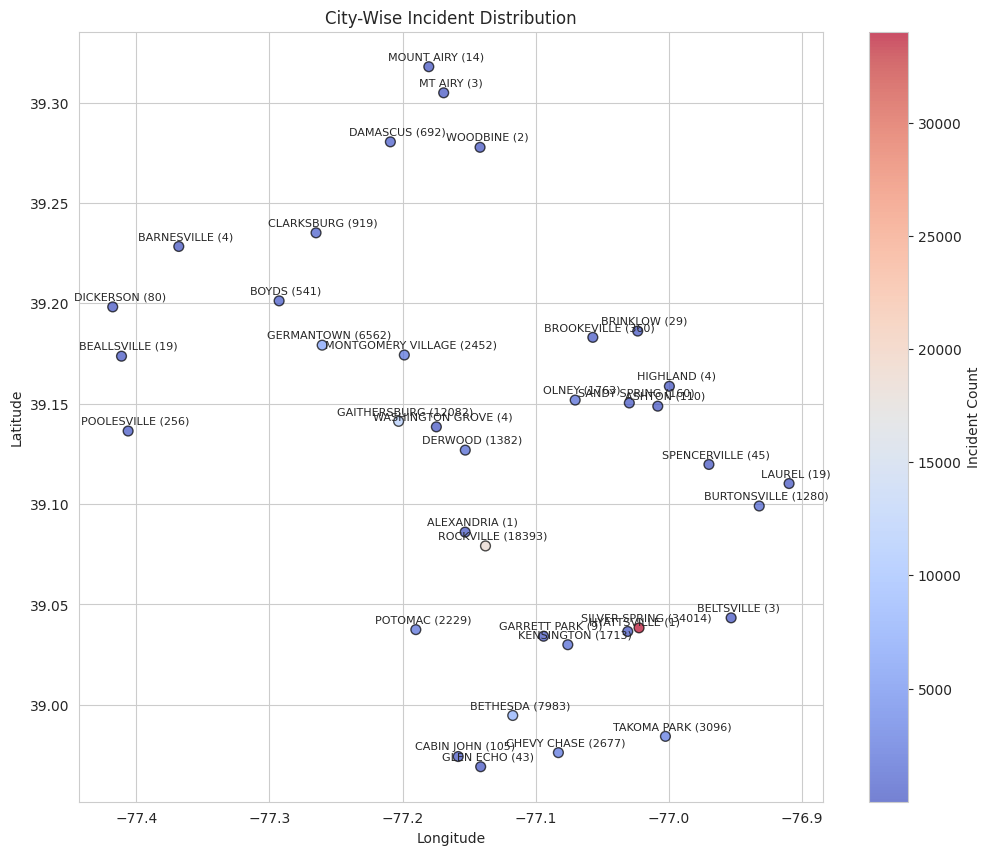

In [396]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Convert coordinates to a GeoDataFrame
df_cleaned['geometry'] = [Point(xy) for xy in zip(df_cleaned['Longitude'], df_cleaned['Latitude'])]
gdf = gpd.GeoDataFrame(df_cleaned, geometry='geometry', crs='EPSG:4326')

# Filter out rows with invalid coordinates
gdf = gdf[(gdf['Latitude'] != 0) & (gdf['Longitude'] != 0)]

# Group by city to calculate the average coordinates and incident count per city
city_summary = gdf.groupby('City').agg(
    Avg_Latitude=('Latitude', 'mean'),
    Avg_Longitude=('Longitude', 'mean'),
    Incident_Count=('Incident ID', 'size')
).reset_index()

# Create GeoDataFrame for city_summary
city_summary['geometry'] = [Point(xy) for xy in zip(city_summary['Avg_Longitude'], city_summary['Avg_Latitude'])]
city_gdf = gpd.GeoDataFrame(city_summary, geometry='geometry', crs='EPSG:4326')

# Plot cities with incident counts (using uniform marker size)
plt.figure(figsize=(12, 10))

# Color palette for better visualization
colors = sns.color_palette("coolwarm", as_cmap=True)

# Plot each city, using a uniform marker size
plt.scatter(city_summary['Avg_Longitude'], city_summary['Avg_Latitude'],
            s=50,  # Uniform marker size for all cities
            c=city_summary['Incident_Count'], cmap=colors, alpha=0.7, edgecolor='k')

# Annotate each city with its name and incident count
for _, row in city_summary.iterrows():
    plt.annotate(f"{row['City']} ({row['Incident_Count']})",
                 (row['Avg_Longitude'], row['Avg_Latitude']),
                 textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Add grid, title, and labels
plt.title('City-Wise Incident Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Incident Count', orientation='vertical')
plt.grid(True)

# Show the plot
plt.show()


In [397]:
# Obtain a list of cities with incident counts
city_incidents = df_cleaned.groupby('City')['Incident ID'].count().reset_index().rename(columns={'Incident ID': 'Incident Count'})
print(city_incidents)


                  City  Incident Count
0           ALEXANDRIA               1
1               ASHTON             114
2          BARNESVILLE               4
3          BEALLSVILLE              19
4           BELTSVILLE               8
5             BETHESDA            8172
6                BOYDS             556
7             BRINKLOW              29
8          BROOKEVILLE             366
9         BURTONSVILLE            1316
10          CABIN JOHN             105
11         CHEVY CHASE            2704
12          CLARKSBURG             930
13            DAMASCUS             699
14             DERWOOD            1396
15           DICKERSON              85
16           FREDERICK               1
17        GAITHERSBURG           12220
18        GARRETT PARK               9
19          GERMANTOWN            6651
20           GLEN ECHO              43
21          HAGERSTOWN               1
22            HIGHLAND               4
23         HYATTSVILLE               5
24          KENSINGTON   

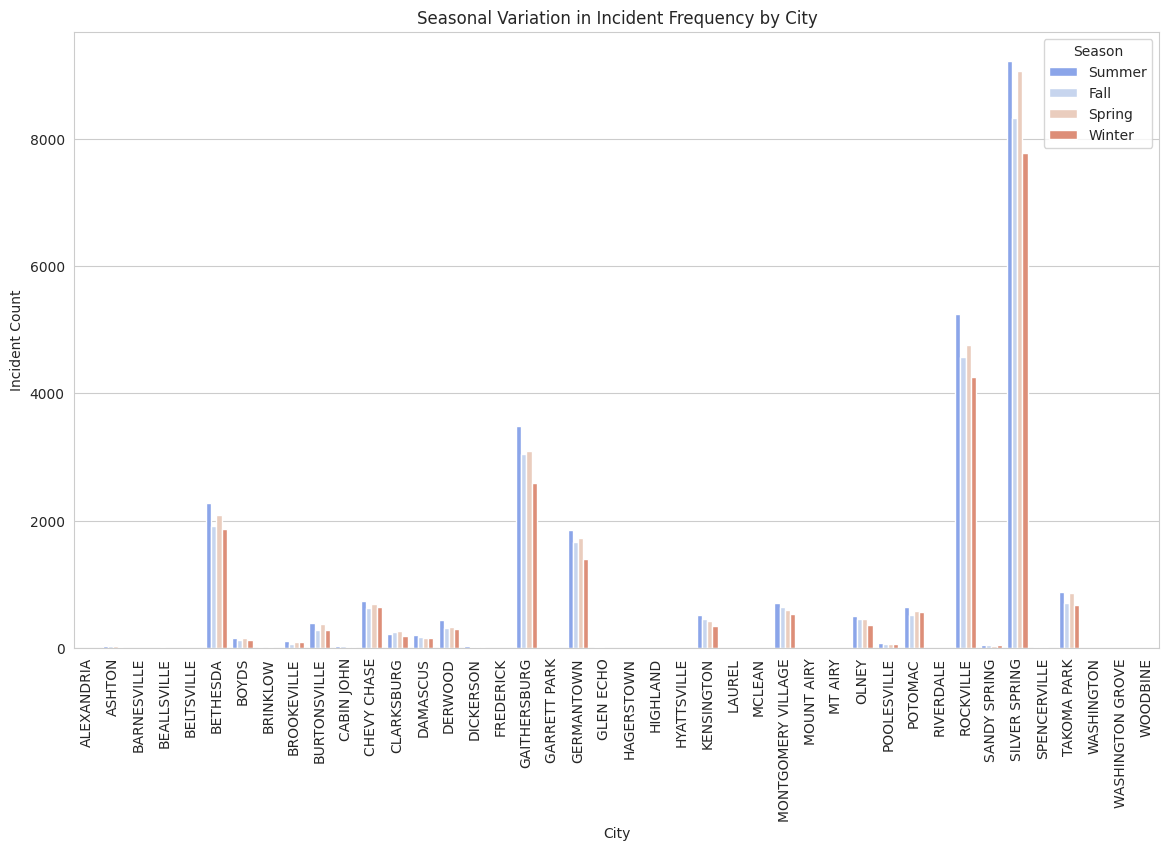

In [398]:
# Extract month from Start Date and assign seasons
df_cleaned['Month'] = pd.DatetimeIndex(df_cleaned['Start Date']).month
df_cleaned['Season'] = df_cleaned['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                 else 'Spring' if x in [3, 4, 5]
                                                 else 'Summer' if x in [6, 7, 8]
                                                 else 'Fall')

# Group by City and Season to get incident counts
seasonal_incidents = df_cleaned.groupby(['City', 'Season'])['Incident ID'].count().reset_index().rename(columns={'Incident ID': 'Incident Count'})

# Plot seasonal trends
plt.figure(figsize=(14, 8))
sns.barplot(data=seasonal_incidents, x='City', y='Incident Count', hue='Season', palette="coolwarm")
plt.title('Seasonal Variation in Incident Frequency by City')
plt.xticks(rotation=90)
plt.ylabel('Incident Count')
plt.legend(title='Season')
plt.show()


## 6.How do crime incident distributions vary across different directional regions of the city, and how does the frequency of these incidents differ by geographic region?

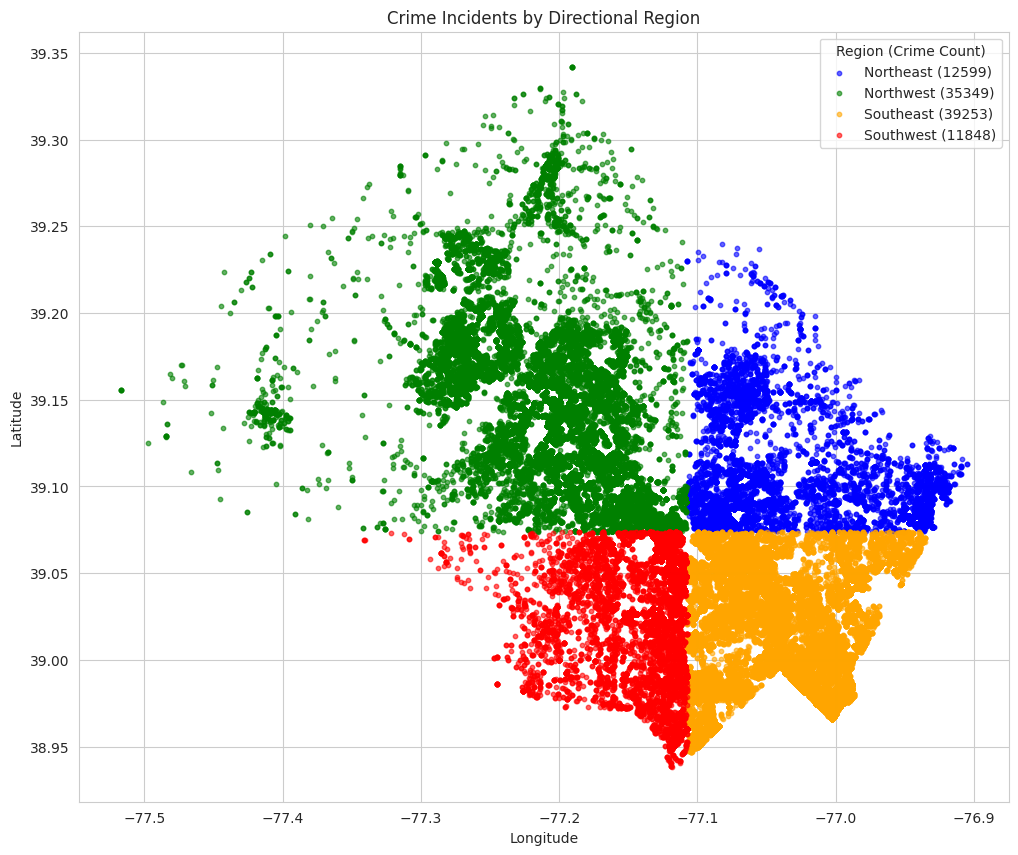

In [399]:
import numpy as np

# Determine the central latitude and longitude
central_lat = gdf['Latitude'].mean()
central_long = gdf['Longitude'].mean()

# Define a function to classify regions based on central point
def classify_region(row):
    if row['Latitude'] >= central_lat and row['Longitude'] >= central_long:
        return 'Northeast'
    elif row['Latitude'] >= central_lat and row['Longitude'] < central_long:
        return 'Northwest'
    elif row['Latitude'] < central_lat and row['Longitude'] >= central_long:
        return 'Southeast'
    else:
        return 'Southwest'

# Apply the function to create a new column for region
gdf['Region'] = gdf.apply(classify_region, axis=1)

# Plot with color-coded regions
plt.figure(figsize=(12, 10))
region_colors = {'Northeast': 'blue', 'Northwest': 'green', 'Southeast': 'orange', 'Southwest': 'red'}
for region, color in region_colors.items():
    subset = gdf[gdf['Region'] == region]
    plt.scatter(subset['Longitude'], subset['Latitude'], label=f"{region} ({len(subset)})", color=color, s=10, alpha=0.6)

plt.title('Crime Incidents by Directional Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Region (Crime Count)', loc='upper right')
plt.grid(True)
plt.show()


<ipython-input-400-021094a35702>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gdf, x='Region', palette="viridis")


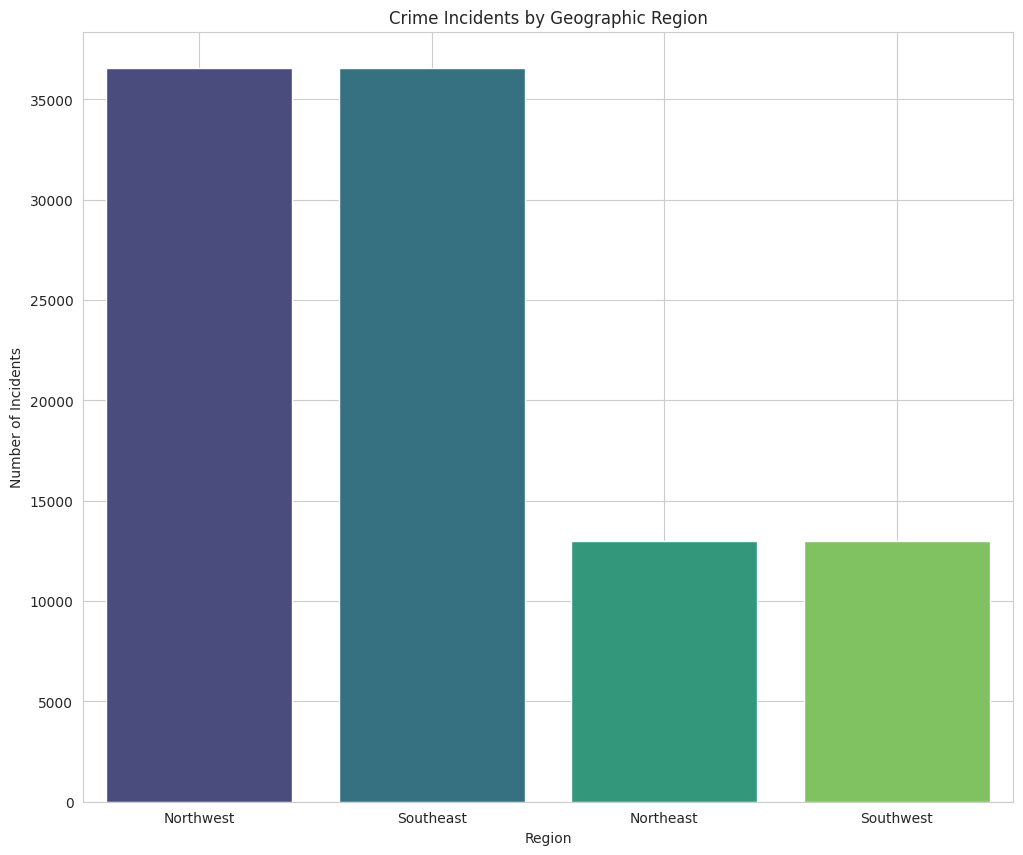

In [400]:
import numpy as np

# Define directional regions based on Longitude and Latitude midpoint
longitude_mid = gdf['Longitude'].median()
latitude_mid = gdf['Latitude'].median()

# Assign region labels based on conditions
gdf['Region'] = np.where((gdf['Latitude'] >= latitude_mid) & (gdf['Longitude'] >= longitude_mid), 'Northeast',
                np.where((gdf['Latitude'] >= latitude_mid) & (gdf['Longitude'] < longitude_mid), 'Northwest',
                np.where((gdf['Latitude'] < latitude_mid) & (gdf['Longitude'] < longitude_mid), 'Southwest',
                         'Southeast')))

# Plotting
plt.figure(figsize=(12, 10))
sns.countplot(data=gdf, x='Region', palette="viridis")
plt.title('Crime Incidents by Geographic Region')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Save output with regions labeled
gdf[['Incident ID', 'City', 'Region', 'Crime Name1']].to_csv('Crime_by_Region.csv', index=False)


In [401]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Strip any extra spaces from column names
gdf.columns = gdf.columns.str.strip()

# Create an empty list to store the hotspots information
hotspot_info = []

# Loop through each crime type and find the most prominent hotspot
crime_types = gdf['Crime Name1'].unique()

for crime in crime_types:
    # Filter data for the current crime type
    crime_data = gdf[gdf['Crime Name1'] == crime]

    # Apply DBSCAN for clustering hotspots (tune `eps` and `min_samples` as needed)
    coords = crime_data[['Latitude', 'Longitude']].values
    db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
    crime_data['Cluster'] = db.labels_

    # Filter out noise points (DBSCAN assigns -1 to noise points)
    hotspots = crime_data[crime_data['Cluster'] != -1]

    # Select the centroid of the largest cluster as the hotspot
    if not hotspots.empty:
        largest_cluster = hotspots.groupby('Cluster').size().idxmax()  # Find the largest cluster
        # Calculate the centroid based only on numeric columns
        centroid = hotspots[hotspots['Cluster'] == largest_cluster][['Latitude', 'Longitude']].mean()

        # Get the city for this cluster
        city = hotspots[hotspots['Cluster'] == largest_cluster]['City'].iloc[0]

        # Append the result to the list
        hotspot_info.append({'Crime': crime, 'City': city, 'Latitude': centroid['Latitude'], 'Longitude': centroid['Longitude']})

# Convert the list to a DataFrame
hotspot_df = pd.DataFrame(hotspot_info)

# Output the list of hotspots with crime and city
print(hotspot_df)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                    Crime           City   Latitude  Longitude
0   Crime Against Society   GAITHERSBURG  39.063845 -77.087794
1  Crime Against Property    CHEVY CHASE  39.070113 -77.106498
2                   Other  SILVER SPRING  39.074804 -77.110626
3    Crime Against Person  SILVER SPRING  39.076828 -77.106270
4             Not a Crime  SILVER SPRING  39.054198 -77.057557


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## 7.What are the key crime hotspots in different cities, and how do they vary by crime type?

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

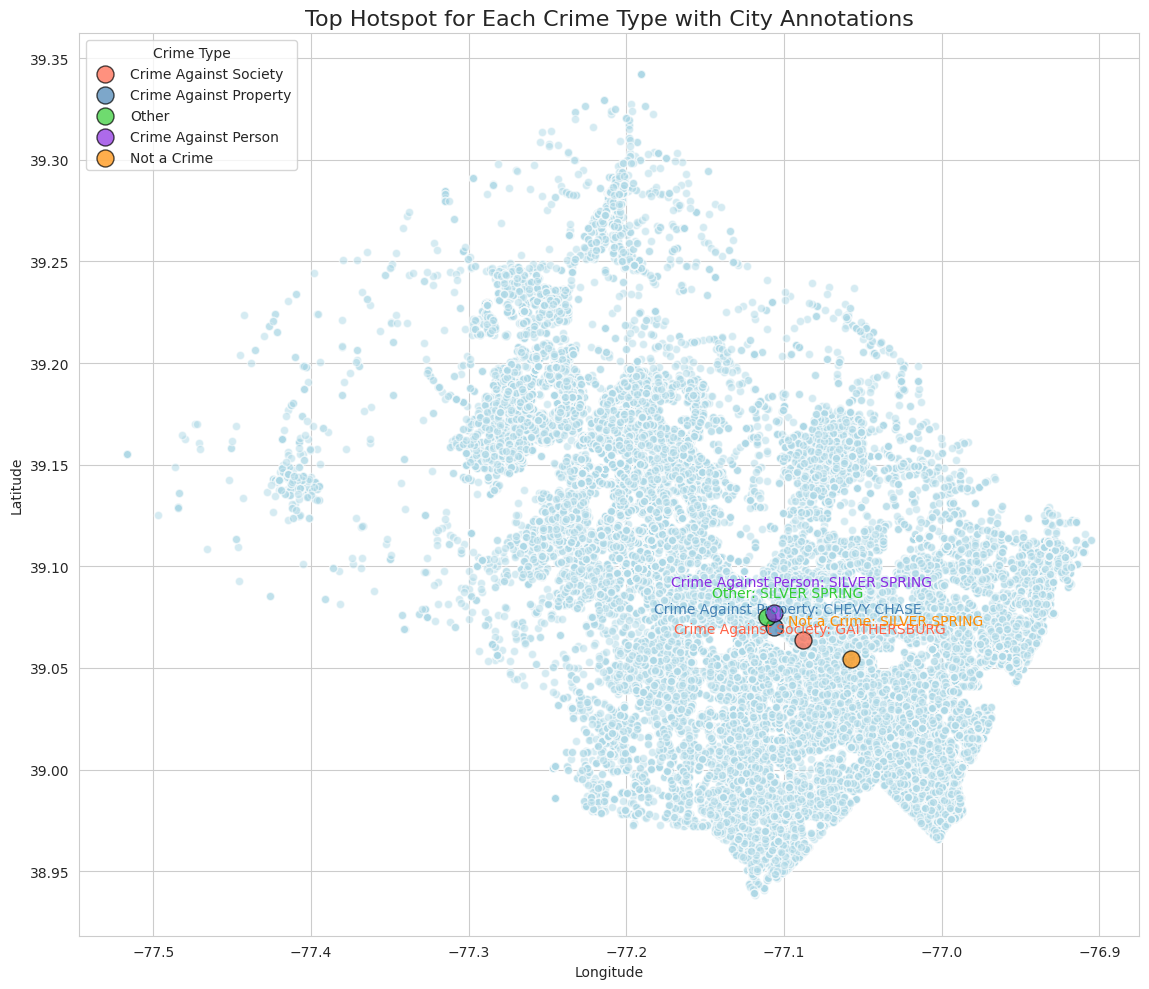

In [402]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import Point

# Strip any extra spaces from column names
gdf.columns = gdf.columns.str.strip()

# Check if the column exists
if 'Crime Name1' not in gdf.columns or 'City' not in gdf.columns:
    print("Error: Required columns not found in the DataFrame")
else:
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 10))

    # Define the number of hotspots to select
    num_hotspots = 1  # One point per crime type

    # Plot the city map with a more visually appealing background
    gdf.plot(ax=ax, color='lightblue', edgecolor='white', alpha=0.5)

    # Crime type colors with higher contrast
    crime_colors = ['#FF6347', '#4682B4', '#32CD32', '#8A2BE2', '#FF8C00']  # Red, Blue, Green, Purple, Orange

    # Loop through each crime type and find the most prominent hotspot
    crime_types = gdf['Crime Name1'].unique()

    for i, crime in enumerate(crime_types):
        # Filter data for the current crime type
        crime_data = gdf[gdf['Crime Name1'] == crime]

        # Apply DBSCAN for clustering hotspots (tune `eps` and `min_samples` as needed)
        coords = crime_data[['Latitude', 'Longitude']].values
        db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
        crime_data['Cluster'] = db.labels_

        # Filter out noise points (DBSCAN assigns -1 to noise points)
        hotspots = crime_data[crime_data['Cluster'] != -1]

        # Select the centroid of the largest cluster as the hotspot
        if not hotspots.empty:
            largest_cluster = hotspots.groupby('Cluster').size().idxmax()  # Find the largest cluster
            # Calculate the centroid based only on numeric columns
            centroid = hotspots[hotspots['Cluster'] == largest_cluster][['Latitude', 'Longitude']].mean()

            # Plot the single hotspot for this crime type
            ax.scatter(centroid['Longitude'], centroid['Latitude'],
                       color=crime_colors[i], s=150, marker='o', edgecolors='black', alpha=0.7, label=crime)

            # Annotate with the city and crime type
            # Get the city and crime type for annotation (use first non-null entry in the cluster)
            city = hotspots[hotspots['Cluster'] == largest_cluster]['City'].iloc[0]

            # Adjust the annotation offset to avoid overlap, by increasing distance
            offset_x = 5 * (i+1)  # Increase offset for each crime type to spread them out
            offset_y = 5 * (i+1)

            ax.annotate(f"{crime}: {city}",
                        (centroid['Longitude'], centroid['Latitude']),
                        textcoords="offset points",
                        xytext=(offset_x, offset_y),  # Adjust offsets
                        ha='center', fontsize=10, color=crime_colors[i])

    # Add title, grid, and labels
    ax.set_title("Top Hotspot for Each Crime Type with City Annotations", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True)
    ax.legend(title="Crime Type", loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Optionally, save the plot as an image
    # plt.savefig("Crime_Hotspots_Map.png")


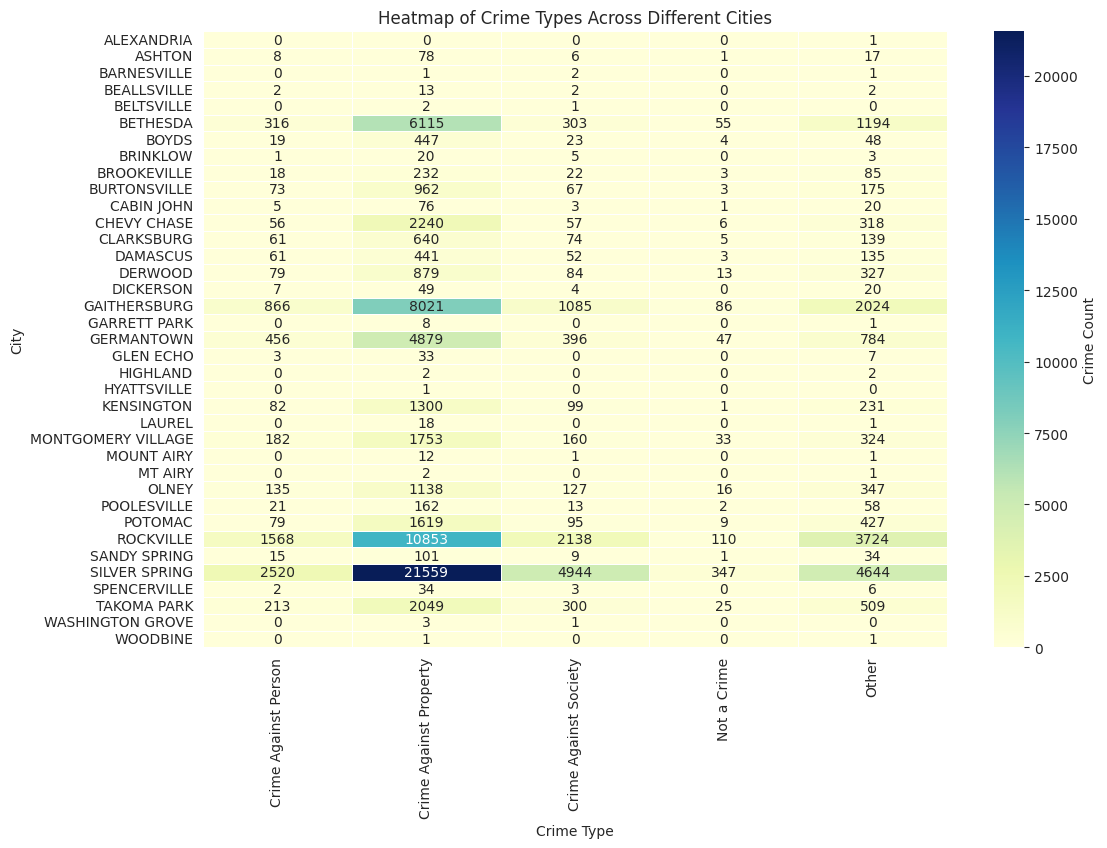

In [403]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Crime Type and calculate the number of occurrences per city
crime_density = gdf.groupby(['Crime Name1', 'City']).size().reset_index(name='Count')

# Pivot the table to get a city vs. crime count matrix
crime_density_pivot = crime_density.pivot(index='City', columns='Crime Name1', values='Count').fillna(0)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_density_pivot, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Crime Count'})
plt.title('Heatmap of Crime Types Across Different Cities')
plt.ylabel('City')
plt.xlabel('Crime Type')
plt.show()


## 8.How do response times vary across cities and crime types, and what are the underlying patterns in these variations?

<ipython-input-404-938c04faeb34>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf['Response Time'] = (pd.to_datetime(gdf['End Time']) - pd.to_datetime(gdf['Start Time'])).dt.total_seconds() / 60
<ipython-input-404-938c04faeb34>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf['Response Time'] = (pd.to_datetime(gdf['End Time']) - pd.to_datetime(gdf['Start Time'])).dt.total_seconds() / 60
<ipython-input-404-938c04faeb34>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{int(x)} min" for x in cbar.get_ticks()])  # Format colorbar labels in minutes


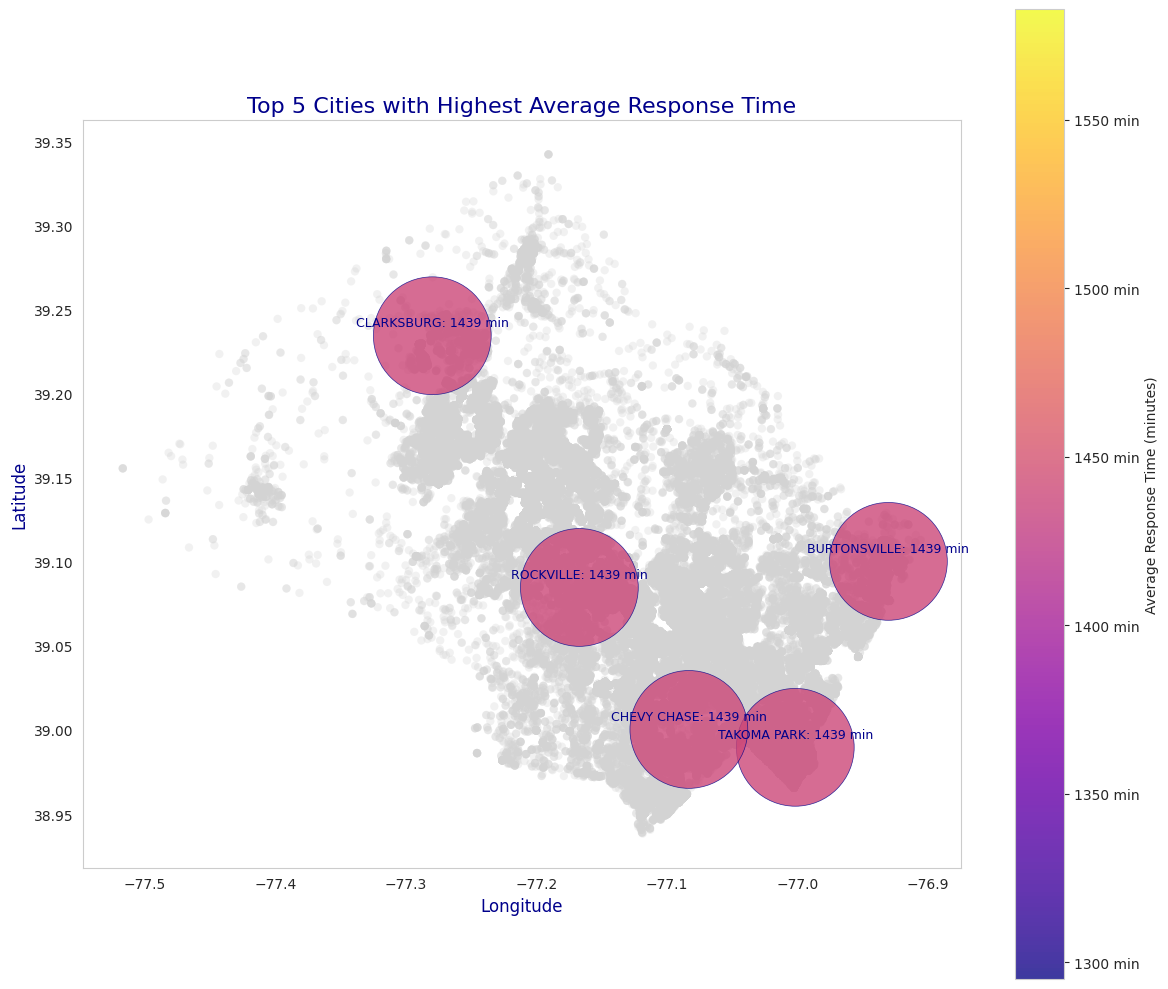

In [404]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Calculate response time in minutes
gdf['Response Time'] = (pd.to_datetime(gdf['End Time']) - pd.to_datetime(gdf['Start Time'])).dt.total_seconds() / 60

# Calculate average response time per city
avg_response_time_city = gdf.groupby(['City', 'Latitude', 'Longitude']).agg({'Response Time': 'mean'}).reset_index()

# Sort and select top 5 cities with the highest unique response times
top_5_cities = avg_response_time_city.sort_values(by='Response Time', ascending=False).drop_duplicates(subset=['City']).head(5)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, color='lightgray', edgecolor='none', alpha=0.3)  # Set a light gray background for better contrast

# Define color map and bubble size for visualization
sc = ax.scatter(top_5_cities['Longitude'], top_5_cities['Latitude'],
                s=top_5_cities['Response Time'] * 5,  # Scale bubble size up for better visual impact
                c=top_5_cities['Response Time'], cmap='plasma', alpha=0.8, edgecolor='darkblue', linewidth=0.5)

# Annotate each point with city name and rounded response time in minutes
for i, row in top_5_cities.iterrows():
    ax.annotate(f"{row['City']}: {int(row['Response Time'])} min",
                (row['Longitude'], row['Latitude']),
                textcoords="offset points", xytext=(0,7), ha='center', fontsize=9, color='darkblue')

# Add color bar, title, and labels
cbar = plt.colorbar(sc, ax=ax, label='Average Response Time (minutes)')
cbar.ax.set_yticklabels([f"{int(x)} min" for x in cbar.get_ticks()])  # Format colorbar labels in minutes
ax.set_title("Top 5 Cities with Highest Average Response Time", fontsize=16, color='darkblue')
ax.set_xlabel("Longitude", fontsize=12, color='darkblue')
ax.set_ylabel("Latitude", fontsize=12, color='darkblue')

# Enhance style and show the plot
plt.grid(visible=False)  # Remove grid for a cleaner look
plt.tight_layout()
plt.show()


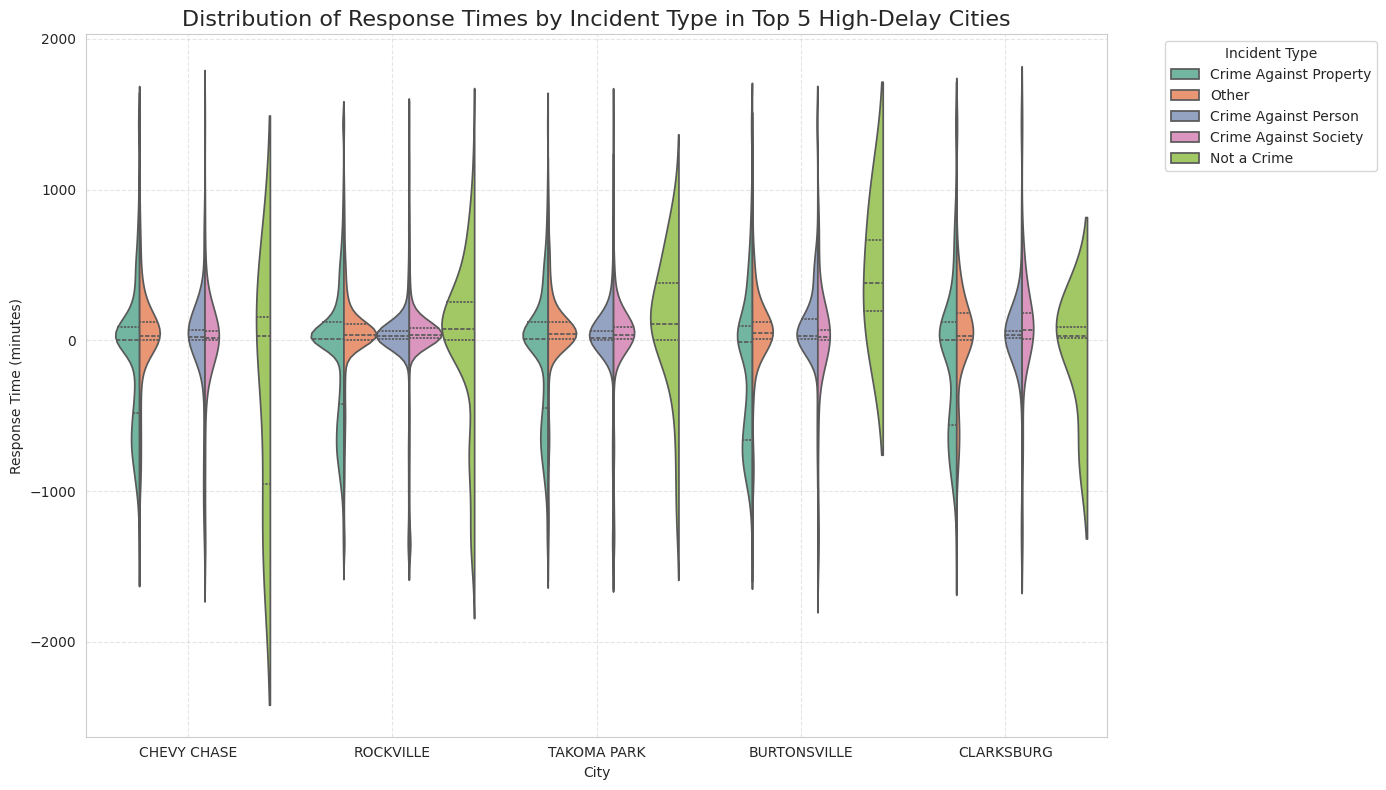

In [405]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 cities with the highest response time
top_5_city_names = top_5_cities['City'].tolist()

# Filter data for the selected top 5 cities
filtered_data = gdf[gdf['City'].isin(top_5_city_names)]

# Plotting violin plot of response times for each incident type in each top city
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_data, x='City', y='Response Time', hue='Crime Name1', split=True, inner="quartile", palette="Set2")

# Customize the plot
plt.title("Distribution of Response Times by Incident Type in Top 5 High-Delay Cities", fontsize=16)
plt.xlabel("City")
plt.ylabel("Response Time (minutes)")
plt.legend(title="Incident Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [406]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by city to calculate the number of crime incidents and total police units per city
city_crimes = gdf.groupby('City').agg(
    total_crimes=('Crime Name1', 'count'),
    total_police_units=('Police District Name', 'sum')
).reset_index()

# Sort the data by the number of total crimes for better visibility
city_crimes_sorted = city_crimes.sort_values(by='total_crimes', ascending=False)

# Display first few rows to check data
print(city_crimes_sorted.head())


             City  total_crimes  \
32  SILVER SPRING         34014   
30      ROCKVILLE         18393   
16   GAITHERSBURG         12082   
5        BETHESDA          7983   
18     GERMANTOWN          6562   

                                   total_police_units  
32  SILVER SPRINGWHEATONSILVER SPRINGWHEATONSILVER...  
30  ROCKVILLEROCKVILLEROCKVILLEROCKVILLEROCKVILLER...  
16  MONTGOMERY VILLAGEMONTGOMERY VILLAGEMONTGOMERY...  
5   BETHESDABETHESDABETHESDABETHESDABETHESDABETHES...  
18  GERMANTOWNGERMANTOWNGERMANTOWNGERMANTOWNGERMAN...  


In [407]:
import geopandas as gpd

# Load your Zip Code shapefile or GeoJSON (replace 'path_to_shapefile.shp' with your actual file path)
zip_codes = gpd.read_file('/content/output_file.shp')  # Or .geojson, depending on your file format


In [408]:
# Exclude (0, 0) coordinates and null geometries from the Zip Code shapefile (if they exist)
zip_codes_filtered = zip_codes[~zip_codes.geometry.isnull()]
zip_codes_filtered = zip_codes_filtered[~zip_codes_filtered.geometry.apply(lambda x: x.contains(Point(0, 0)))]


## 9.How do high-density crime areas, identified geographically by Zip Codes, correlate with the types of crimes occurring within those regions?"

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
<ipython-input-409-518f07590bb5>:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zip_centroids['centroid'] = zip_centroids.centroid
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


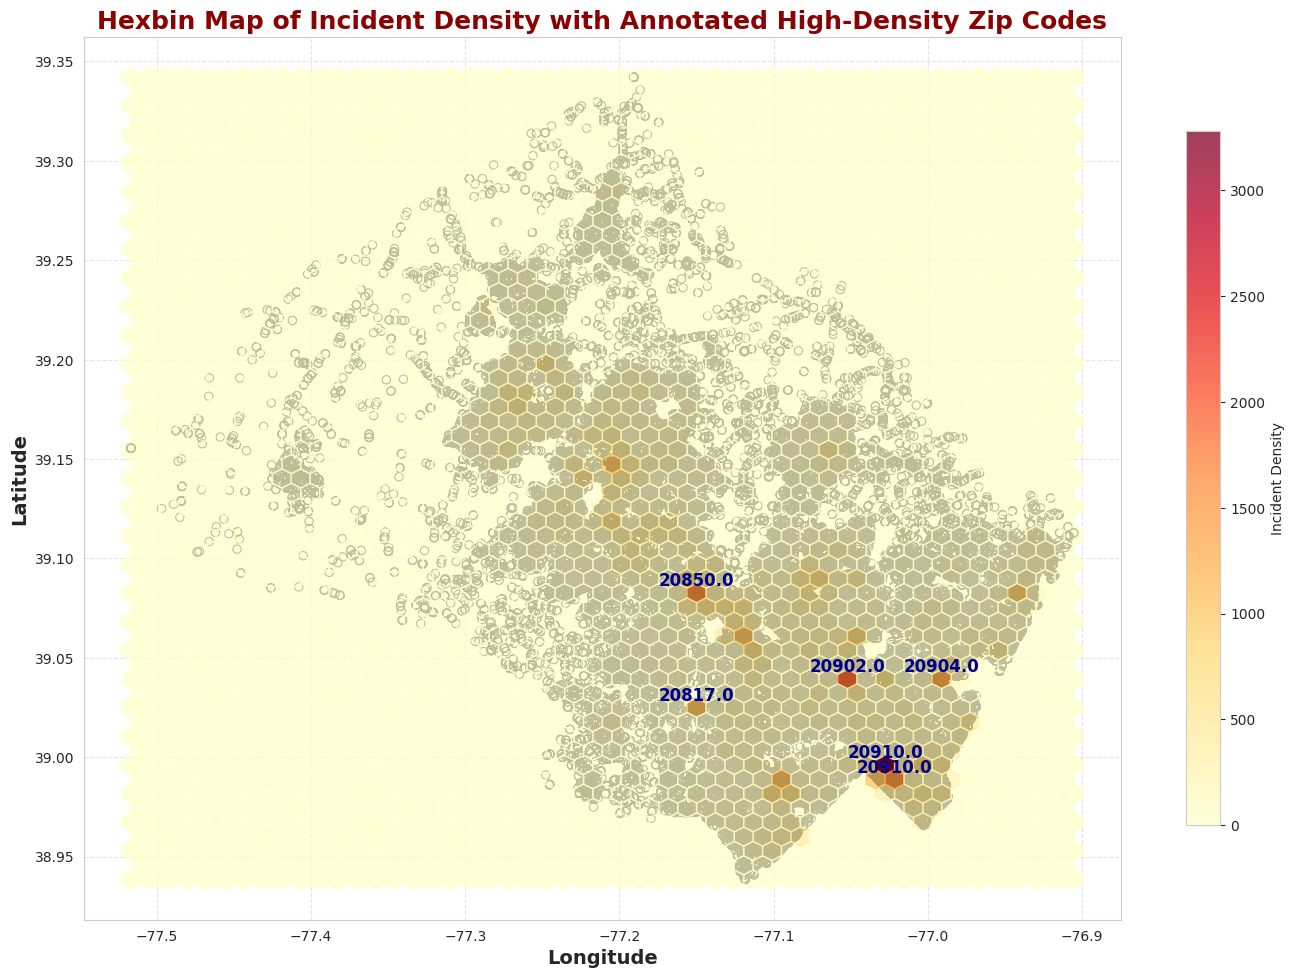

                        geometry  Zip Code  density
876    POINT (-77.14991 39.0249)   20817.0   1043.0
880   POINT (-77.14991 39.08257)   20850.0   1629.0
1109  POINT (-77.05209 39.03932)   20902.0   1867.0
1164  POINT (-77.02763 38.99607)   20910.0   3277.0
1254  POINT (-76.99095 39.03932)   20904.0   1282.0
2602  POINT (-77.02152 38.98886)   20910.0   1539.0


In [409]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from scipy.spatial import cKDTree

# Ensure both GeoDataFrames have the same CRS
gdf_filtered = gdf_filtered.to_crs("EPSG:4326")  # Example CRS; replace with actual CRS if needed
zip_codes_filtered = zip_codes_filtered.to_crs(gdf_filtered.crs)

# Plotting hexbin map with Zip Code boundaries
plt.figure(figsize=(14, 10))

# Create axis for the plot
ax = plt.gca()

# Plot Zip Code boundaries
zip_codes_filtered.plot(ax=ax, edgecolor="black", color="none", linewidth=0.8)

# Plot hexbin map of incidents with transparency
hb = ax.hexbin(gdf_filtered['Longitude'], gdf_filtered['Latitude'], gridsize=50, cmap="YlOrRd", alpha=0.75)
plt.colorbar(hb, label="Incident Density", shrink=0.75)

# Define a threshold for high-density areas (99.8th percentile)
threshold = np.percentile(hb.get_array(), 99.8)

# Get hexbin centers and densities
x_hex, y_hex = hb.get_offsets().T
density_values = hb.get_array()

# Create GeoDataFrame for hexbin centers
hexbin_points = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(x_hex, y_hex)], crs=gdf_filtered.crs)
hexbin_points['density'] = density_values

# Filter for high-density hexbin centers
high_density_points = hexbin_points[hexbin_points['density'] >= threshold]

# Use nearest-neighbor search to assign Zip Codes to hexbin centers
zip_centroids = zip_codes_filtered.copy()
zip_centroids['centroid'] = zip_centroids.centroid
zip_centroids = zip_centroids.set_geometry('centroid')  # Set centroids as geometry for distance calculations

# Create arrays for high-density points and zip centroids
hex_coords = np.array([(geom.x, geom.y) for geom in high_density_points.geometry])
zip_coords = np.array([(geom.x, geom.y) for geom in zip_centroids.geometry])

# KD-Tree nearest-neighbor search for each hexbin center
tree = cKDTree(zip_coords)
distances, indices = tree.query(hex_coords)

# Get the nearest Zip Codes for high-density points
high_density_points['Zip Code'] = zip_centroids.iloc[indices]['Zip Code'].values

# Annotate high-density hexagons with Zip Code
for i, row in high_density_points.iterrows():
    x, y = row.geometry.x, row.geometry.y
    zip_code = row['Zip Code']

    # Annotate with the Zip Code
    ax.annotate(f"{zip_code}", (x, y),  # Annotate with Zip Code
                textcoords="offset points", xytext=(0, 5), ha='center', fontsize=12,
                color='darkblue', fontweight='bold', fontname='Arial')

# Add title and labels
plt.title("Hexbin Map of Incident Density with Annotated High-Density Zip Codes", fontsize=18, fontweight='bold', color='darkred')
plt.xlabel("Longitude", fontsize=14, fontweight='bold')
plt.ylabel("Latitude", fontsize=14, fontweight='bold')

# Enhance plot readability
plt.grid(True, linestyle='--', alpha=0.5)  # Soft grid lines
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print high-density points and matched Zip Codes for verification
print(high_density_points[['geometry', 'Zip Code', 'density']])


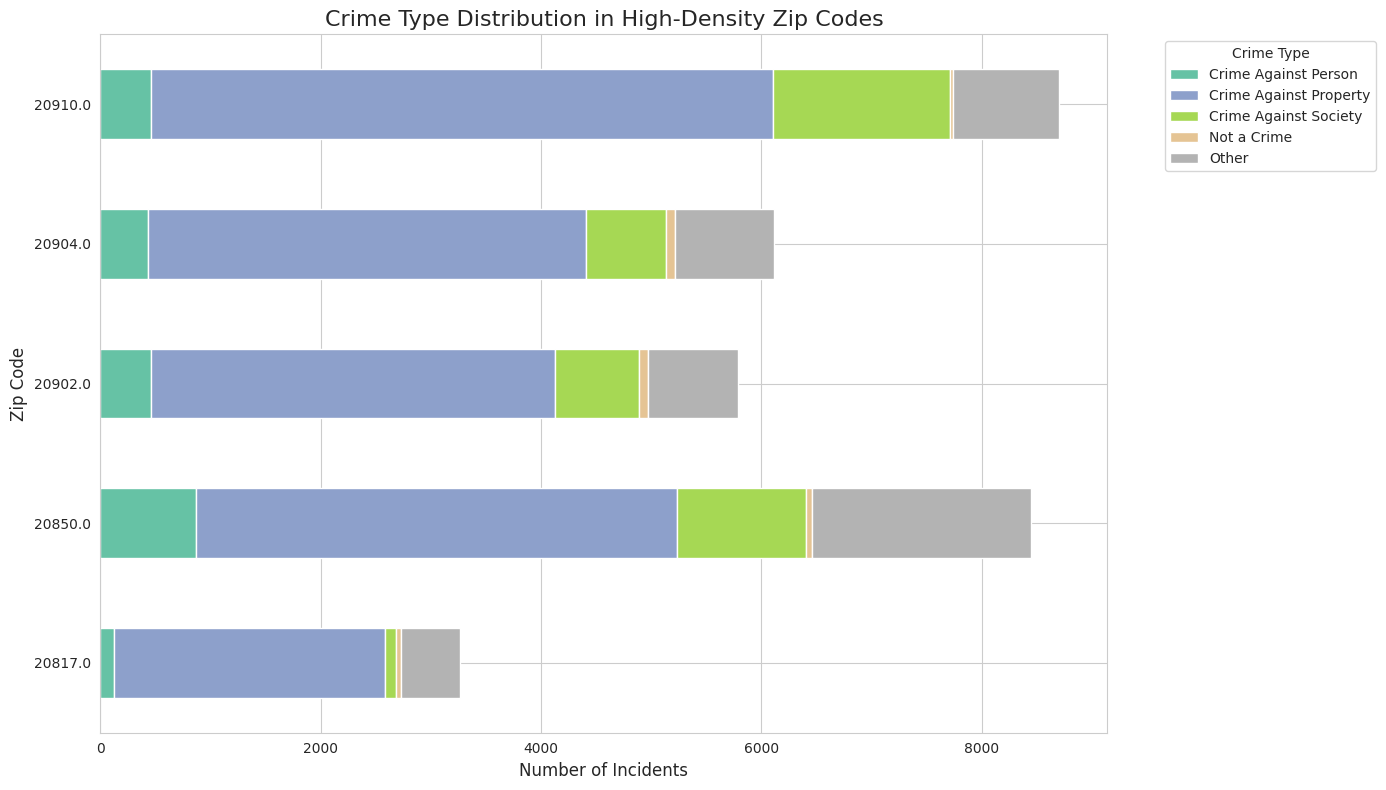

In [410]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume `high_density_zip_codes` is the list of Zip Codes from high-density areas
# Replace with the actual Zip Codes found in the previous output
high_density_zip_codes = high_density_points['Zip Code'].unique()

# Filter the original data to only include incidents in the high-density Zip Codes
filtered_data = gdf_filtered[gdf_filtered['Zip Code'].isin(high_density_zip_codes)]

# Group data by Zip Code and Crime Type to get the count of each crime type per Zip Code
crime_type_distribution = filtered_data.groupby(['Zip Code', 'Crime Name1']).size().unstack(fill_value=0)

# Plotting the stacked bar chart for the high-density Zip Codes
plt.figure(figsize=(14, 8))
crime_type_distribution.plot(kind='barh', stacked=True, colormap="Set2", ax=plt.gca())

# Add labels and title
plt.title("Crime Type Distribution in High-Density Zip Codes", fontsize=16)
plt.xlabel("Number of Incidents", fontsize=12)
plt.ylabel("Zip Code", fontsize=12)

# Customize the legend
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Enhance plot readability
plt.tight_layout()

# Show the plot
plt.show()


In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Filter for "Not a Crime" incidents
not_a_crime_data = gdf_filtered[gdf_filtered['Crime Name1'] == 'Not a Crime']

# Ensure the Place column is categorical for plotting
not_a_crime_data['Place'] = not_a_crime_data['Place'].astype('category')


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## 10.How do 'Not a Crime' incidents vary across different Zip Codes and Place Types, and what are the trends in incident frequency within these areas?

<ipython-input-414-1aec0e758ac8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_distribution = not_a_crime_data.groupby(['Zip Code', 'Place']).size().unstack(fill_value=0)


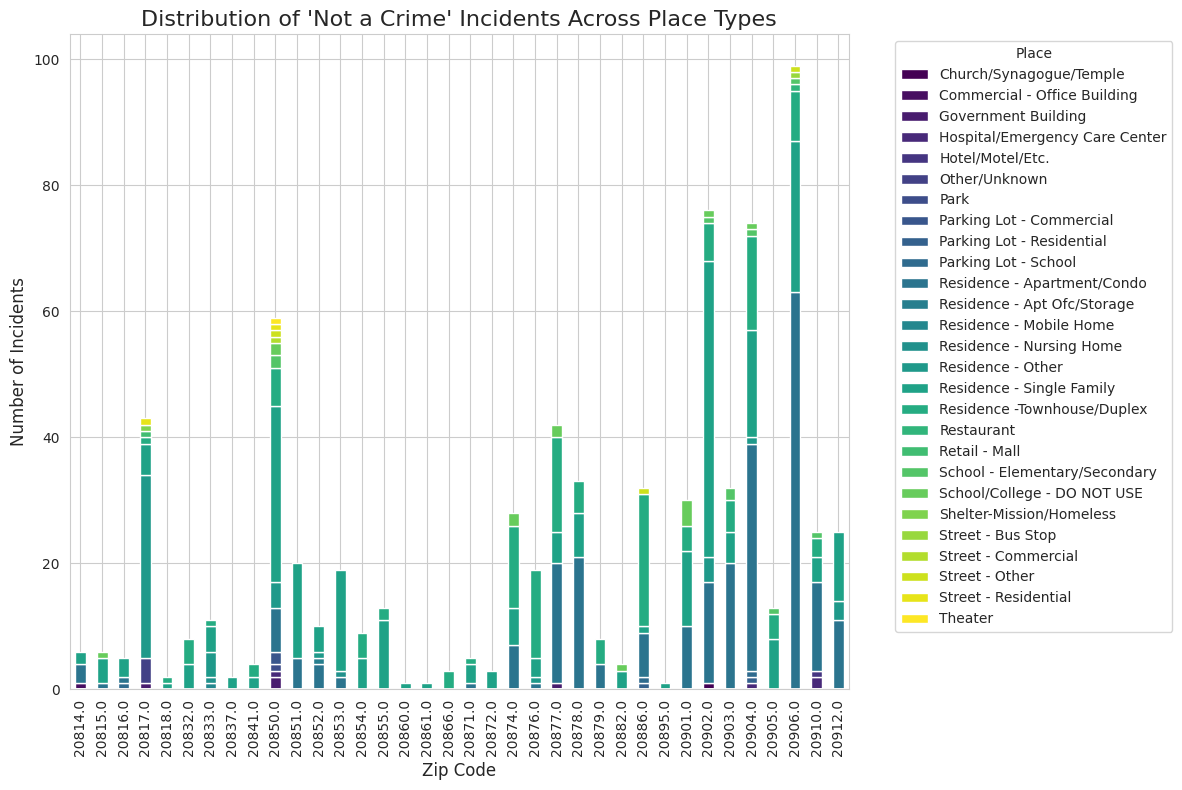

In [414]:
# Group by Zip Code and Place to get counts of each place type in "Not a Crime" incidents
place_distribution = not_a_crime_data.groupby(['Zip Code', 'Place']).size().unstack(fill_value=0)

# Plotting the stacked bar chart (vertical this time)
plt.figure(figsize=(12, 8))
place_distribution.plot(kind='bar', stacked=True, colormap="viridis", ax=plt.gca())  # Vertical bars, different color palette

# Add labels and title
plt.title("Distribution of 'Not a Crime' Incidents Across Place Types", fontsize=16)
plt.xlabel("Zip Code", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)

# Customize the legend
plt.legend(title="Place", bbox_to_anchor=(1.05, 1), loc='upper left')

# Enhance plot readability
plt.tight_layout()
plt.show()


<ipython-input-415-7f9979533677>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_distribution_matrix = not_a_crime_data.groupby(['Zip Code', 'Place']).size().unstack(fill_value=0)


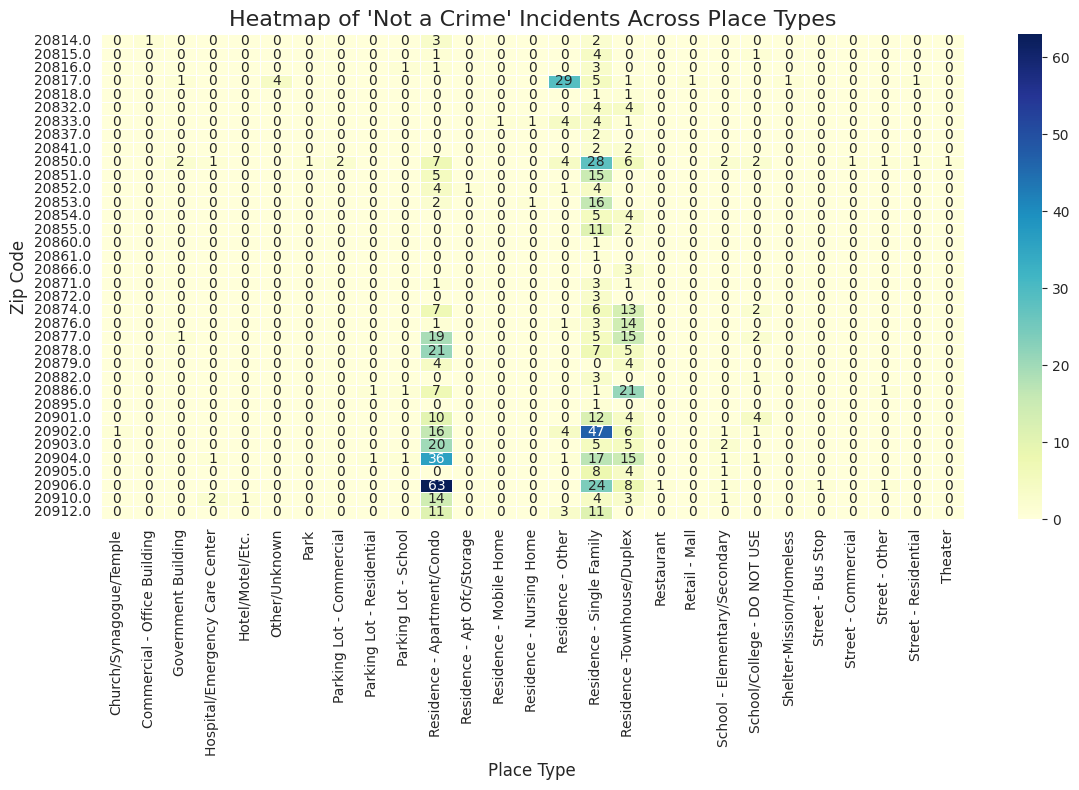

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the place distribution into a matrix format (Zip Code vs. Place)
place_distribution_matrix = not_a_crime_data.groupby(['Zip Code', 'Place']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(place_distribution_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5)

# Add labels and title
plt.title("Heatmap of 'Not a Crime' Incidents Across Place Types", fontsize=16)
plt.xlabel("Place Type", fontsize=12)
plt.ylabel("Zip Code", fontsize=12)

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [416]:
import pandas as pd

# Group by 'City' to calculate the total number of incidents (crime rate)
city_crime_data = not_a_crime_data.groupby('City').size().reset_index(name='Total Crime Incidents')

# Assuming each unique 'Police District Name' represents a police station
city_police_data = not_a_crime_data.groupby('City')['Police District Name'].nunique().reset_index(name='Total Police Stations')

# Merge the crime data and police data
city_data = pd.merge(city_crime_data, city_police_data, on='City')


## 11.How does the distribution of crime incidents across cities compare to the number of police stations allocated, and do any cities exhibit a need for additional police resources based on crime rates?

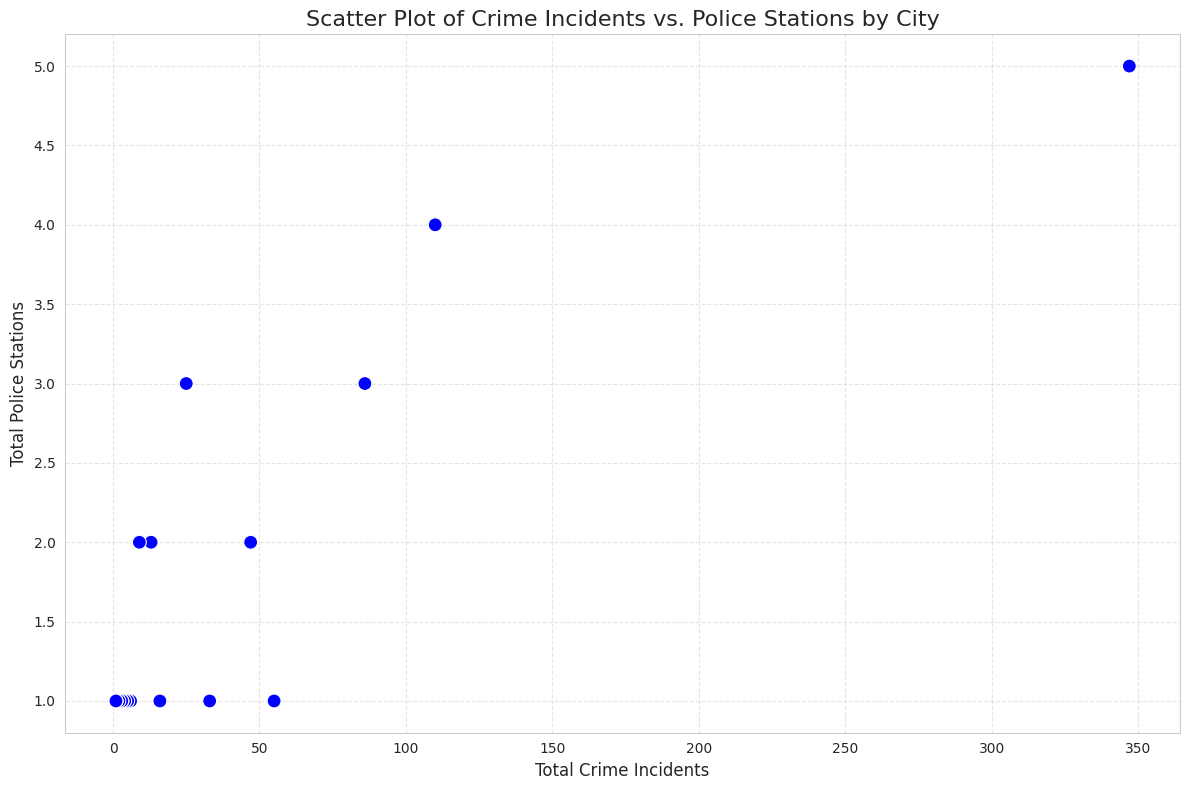

In [417]:
# Set new thresholds based on your dataset's range
city_data_sorted['High Crime Low Police'] = (city_data_sorted['Total Crime Incidents'] > 250) & (city_data_sorted['Total Police Stations'] < 3)

# Plotting the adjusted scatter plot
plt.figure(figsize=(12, 8))

# Plot all cities as scatter points with color coding
sns.scatterplot(data=city_data_sorted,
                x='Total Crime Incidents',
                y='Total Police Stations',
                hue='High Crime Low Police',
                palette={True: 'red', False: 'blue'},
                legend=False,
                s=100, marker='o')

# Adding labels and title
plt.title("Scatter Plot of Crime Incidents vs. Police Stations by City", fontsize=16)
plt.xlabel("Total Crime Incidents", fontsize=12)
plt.ylabel("Total Police Stations", fontsize=12)

# Annotate cities with high crime but low police stations
for i in range(len(city_data_sorted)):
    if city_data_sorted['High Crime Low Police'].iloc[i]:
        plt.text(city_data_sorted['Total Crime Incidents'].iloc[i] + 50,
                 city_data_sorted['Total Police Stations'].iloc[i],
                 city_data_sorted['City'].iloc[i],
                 fontsize=10, color='black', fontweight='bold')

# Add grid for better visual clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-418-28360b954f3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data_sorted, x='Total Crime Incidents', ax=axes[0], palette=crime_palette)
<ipython-input-418-28360b954f3b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data_sorted, x='Total Police Stations', ax=axes[1], palette=police_palette)


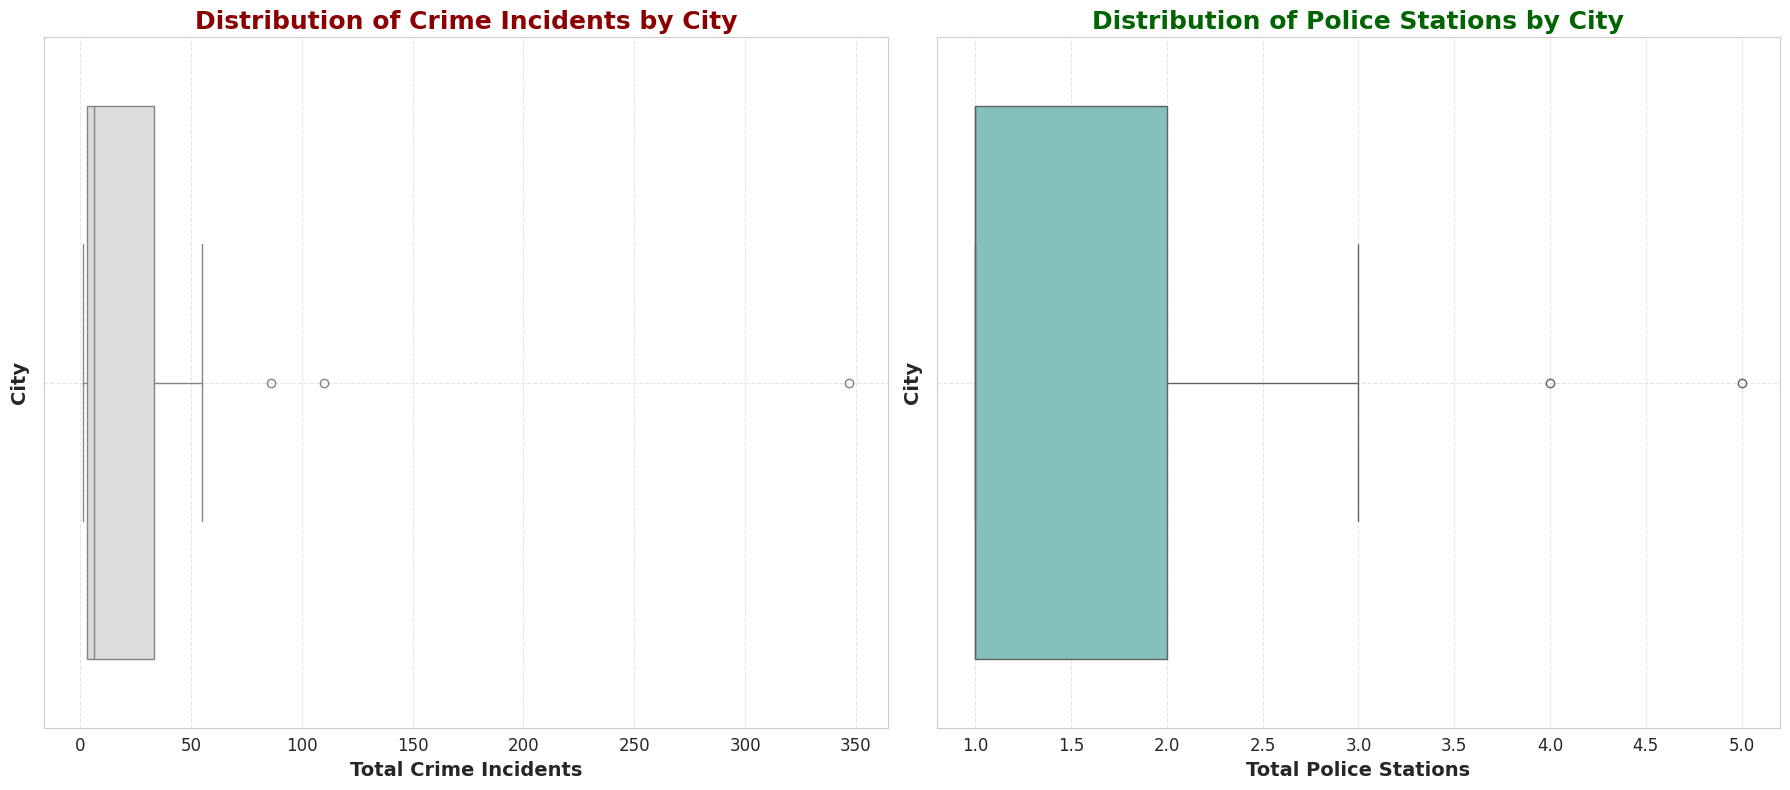

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for Crime Incidents and Police Stations
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Set a color palette for the plots
crime_palette = "coolwarm"
police_palette = "GnBu"

# Plotting the box plot for Crime Incidents
sns.boxplot(data=city_data_sorted, x='Total Crime Incidents', ax=axes[0], palette=crime_palette)
axes[0].set_title('Distribution of Crime Incidents by City', fontsize=18, fontweight='bold', color='darkred')
axes[0].set_xlabel('Total Crime Incidents', fontsize=14, fontweight='bold')
axes[0].set_ylabel('City', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plotting the box plot for Police Stations
sns.boxplot(data=city_data_sorted, x='Total Police Stations', ax=axes[1], palette=police_palette)
axes[1].set_title('Distribution of Police Stations by City', fontsize=18, fontweight='bold', color='darkgreen')
axes[1].set_xlabel('Total Police Stations', fontsize=14, fontweight='bold')
axes[1].set_ylabel('City', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust the layout to ensure readability and avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## 12.Which streets experience the highest frequency of crime incidents, and what are the most common types of crimes on these high-frequency streets?

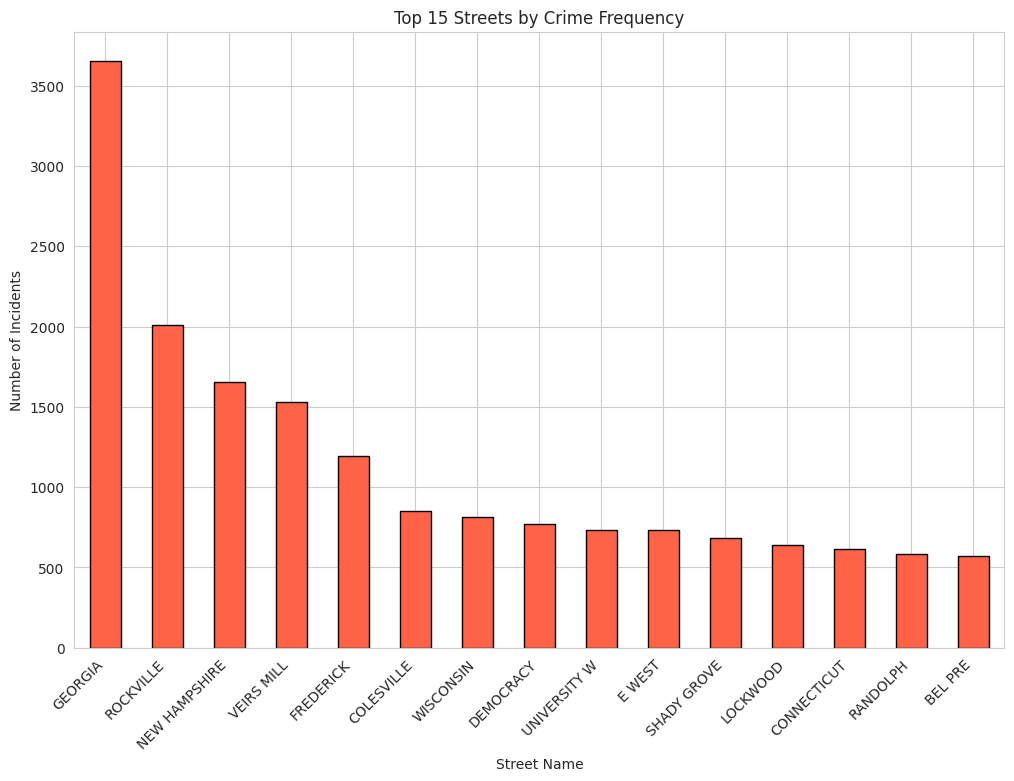

In [419]:
# Count of incidents by street name, focusing on the top 15
top_streets = gdf['Street Name'].value_counts().head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_streets.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Top 15 Streets by Crime Frequency')
plt.xlabel('Street Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()


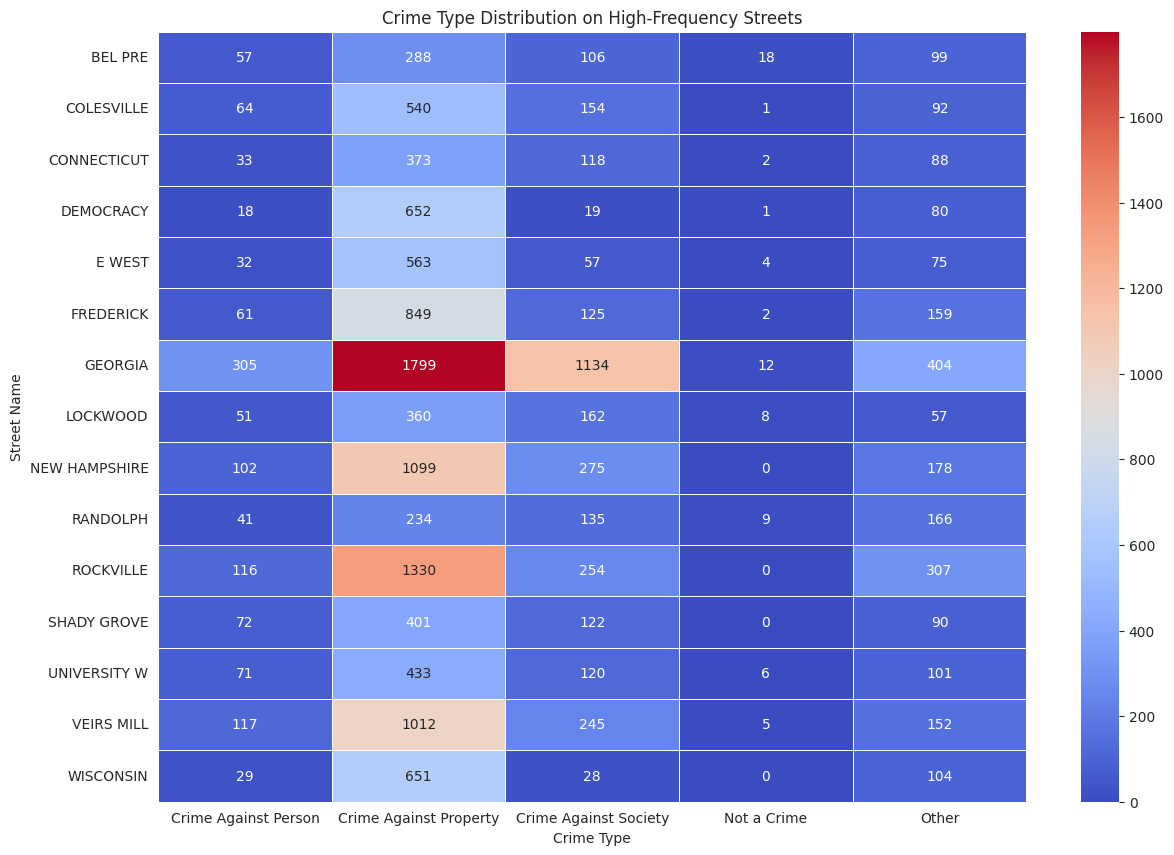

In [420]:
# Filter data for top streets and pivot to create a crime type distribution matrix
high_crime_streets = gdf[gdf['Street Name'].isin(top_streets.index)]
crime_by_street_type = high_crime_streets.groupby(['Street Name', 'Crime Name1']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(crime_by_street_type, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title('Crime Type Distribution on High-Frequency Streets')
plt.xlabel('Crime Type')
plt.ylabel('Street Name')
plt.show()
